# Николаев Алексей Алексекевич, группа 22.М08

# Задача 2. Сравнение методов классификации



## Задача

-  Самостоятельно реализовать один из методов классификации, с возможностью настройки гиперпараметров.
-  Взять данные для предсказания заболеваний сердца [тут](https://github.com/rustam-azimov/ml-course/tree/main/data/heart_disease) (целевой признак для предсказания --- **target**). Демо блокнот с анализом этих данных можно найти [тут](https://github.com/rustam-azimov/ml-course/blob/main/practice/practice07_knn_nb/practice07_part02_classification_heart_disease_demo.ipynb).
-  Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (**Data Cleaning**).
-  Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.
-  При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).
-  Используя **подбор гиперпараметров**, **кросс-валидацию** и при необходимости **масштабирование данных**, добиться наилучшего качества предсказания от Вашей реализации на выделенной заранее тестовой выборке.
-  Повторить предыдущий пункт для библиотечных реализаций (например, из **sklearn**) всех пройденных методов классификации (**logistic regression, svm, knn, naive bayes, decision tree**).
-  Сравнить все обученные модели, построить их **confusion matrices**. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.
-  * (**+2 балла**) Реализовать еще один из методов классификации и добавить его в сравнение.
-  * (**+2 балла**) Найти данные, на которых интересно будет решать задачу классификации. Повторить все пункты задания на новых данных.


In [503]:
%precision 4
import warnings
warnings.filterwarnings('ignore')

## Взять данные для предсказания заболеваний сердца [тут](https://github.com/rustam-azimov/ml-course/tree/main/data/heart_disease) (целевой признак для предсказания --- **target**). Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (**Data Cleaning**).

In [505]:
import pandas as pd

df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [506]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### Описание набора данных
- **age** - возраст в годах
- **sex** - пол (1 - мужской, 0 - женский)
- **cp** - тип боли в груди 
- **trestbps** - артериальное давление в состоянии покоя (в мм рт. ст.)
-  **chol** - уровень холестерина в сыворотке (мг/дл)
- **fbs** - уровень сахара в крови натощак > 120 мг/дл (1 - true, 0 - false)
- **restecg** - результаты электрокардиографии в состоянии покоя 
- **thalach** - достигнутая максимальная частота сердечных сокращений
- **exang** - стенокардия, вызванная физической нагрузкой (1 = да, 0 = нет)
- **oldpeak** - депрессия ST, вызванная физической нагрузкой по сравнению с отдыхом
- **slope** - наклон пикового упражнения ST сегмента 
- **ca** - количество крупных сосудов (0-3), окрашенных флуороскопией
- **thal** - 3 = нормальный; 6 = исправленный дефект; 7 = обратимый дефект
- **target** - наличие или отсутствие сердечного заболевания (0 = отсутствие, 1 = наличие) - **ЦЕЛЕВОЙ ПРИЗНАК**

In [507]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Пропущенные значения в датасете отсутствуют

In [508]:
df.shape

(1025, 14)

Дополнительная чистка данных не требуется. Лишних признаков не наблюдается.

## Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.

Определим количество людей с наличием или отсутствием сердечного заболевания

In [511]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

У 526 человек имеется сердечное заболевание, у 499 оно отсутсвтует

In [512]:
df_dedupped.target.value_counts()

1    164
0    138
Name: target, dtype: int64

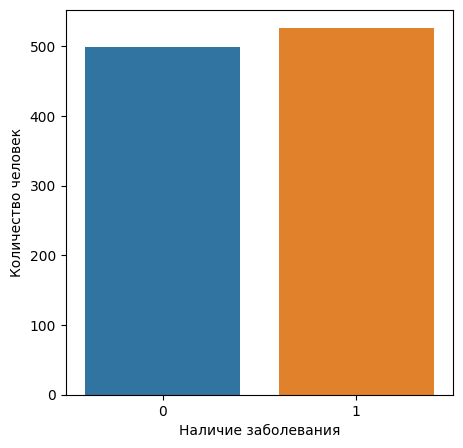

In [513]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x="target")
plt.ylabel('Количество человек');
plt.xlabel('Наличие заболевания');

Из графика видно, что людей с заболеванием больше чем без него

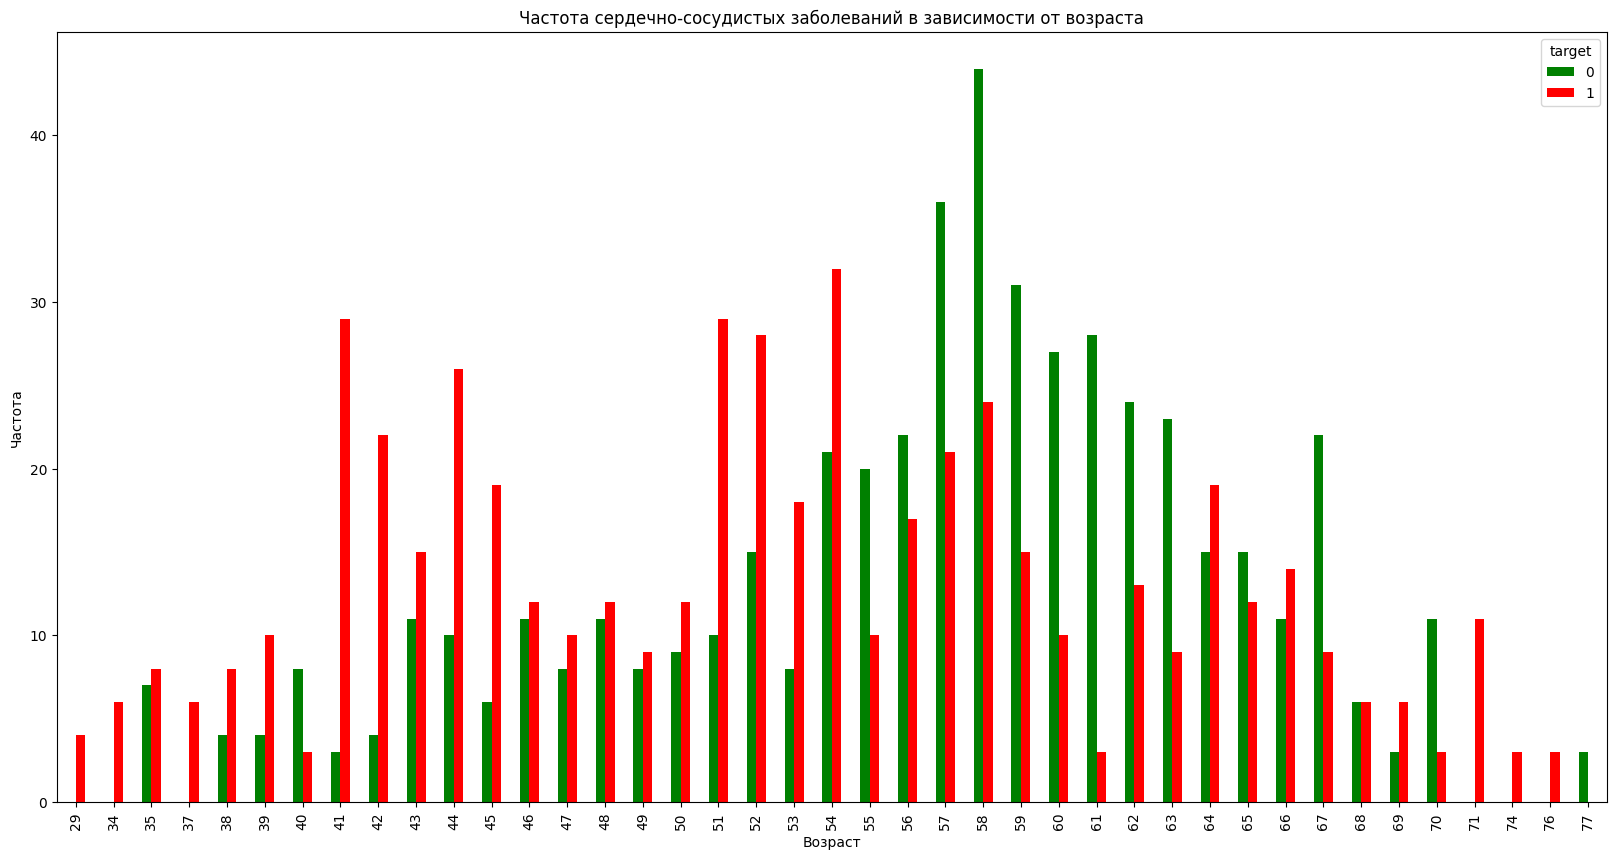

In [514]:
pd.crosstab(df.age,df.target).plot(kind="bar", figsize=(20, 10), color=['green','red'])
plt.title('Частота сердечно-сосудистых заболеваний в зависимости от возраста')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

Из графика видно, что у людей в возрасте от 40 до 45 и от 50 до 60 лет чаще всего выявляется заболевание сердца.

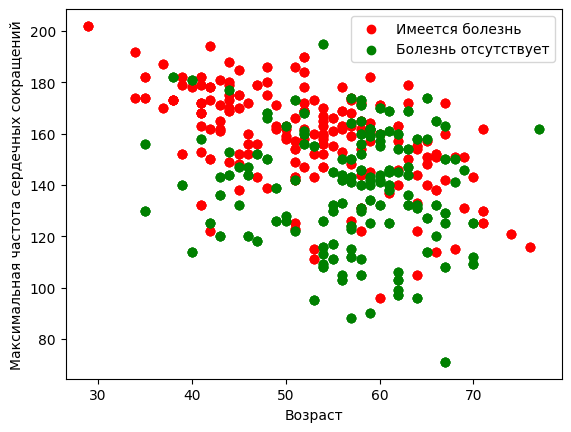

In [515]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)], c="green")
plt.legend(["Имеется болезнь", "Болезнь отсутствует"])
plt.xlabel("Возраст")
plt.ylabel("Максимальная частота сердечных сокращений")
plt.show()

Из графика видно, что заболевание сердца чаще встречается при максимальной частоте сердечных сокращений выше 140

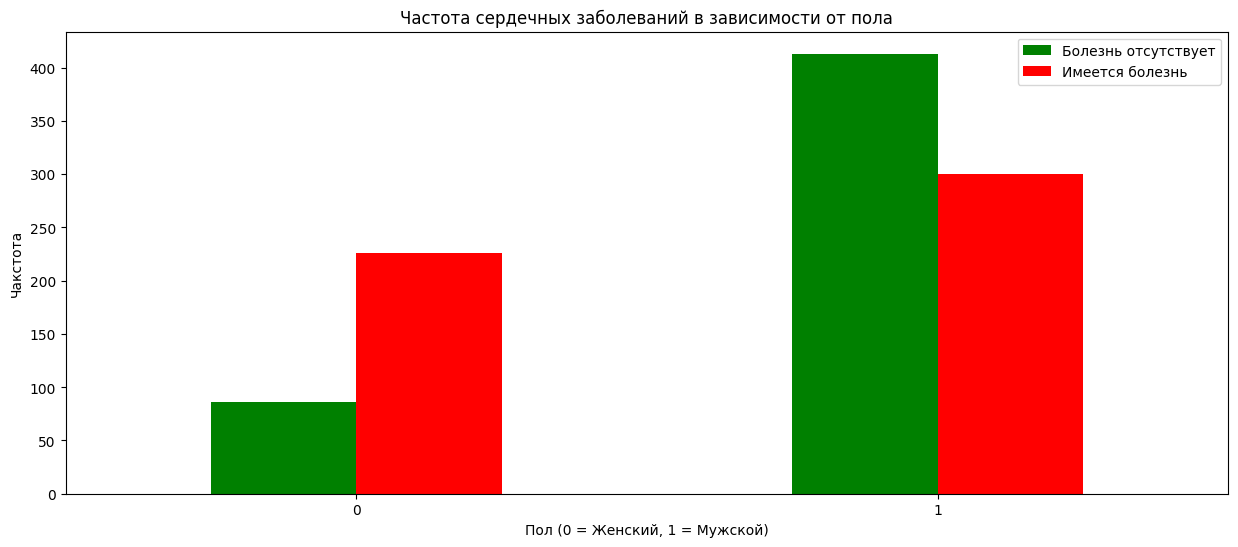

In [516]:
pd.crosstab(df.sex,df.target).plot(kind="bar", figsize=(15, 6), color=['green', 'red' ])
plt.title('Частота сердечных заболеваний в зависимости от пола')
plt.xlabel('Пол (0 = Женский, 1 = Мужской)')
plt.xticks(rotation=0)
plt.legend(["Болезнь отсутствует", "Имеется болезнь"])
plt.ylabel('Чакстота')
plt.show()

In [517]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


Заболевание чаще встречается у мужчин, чем у женщин

<AxesSubplot: >

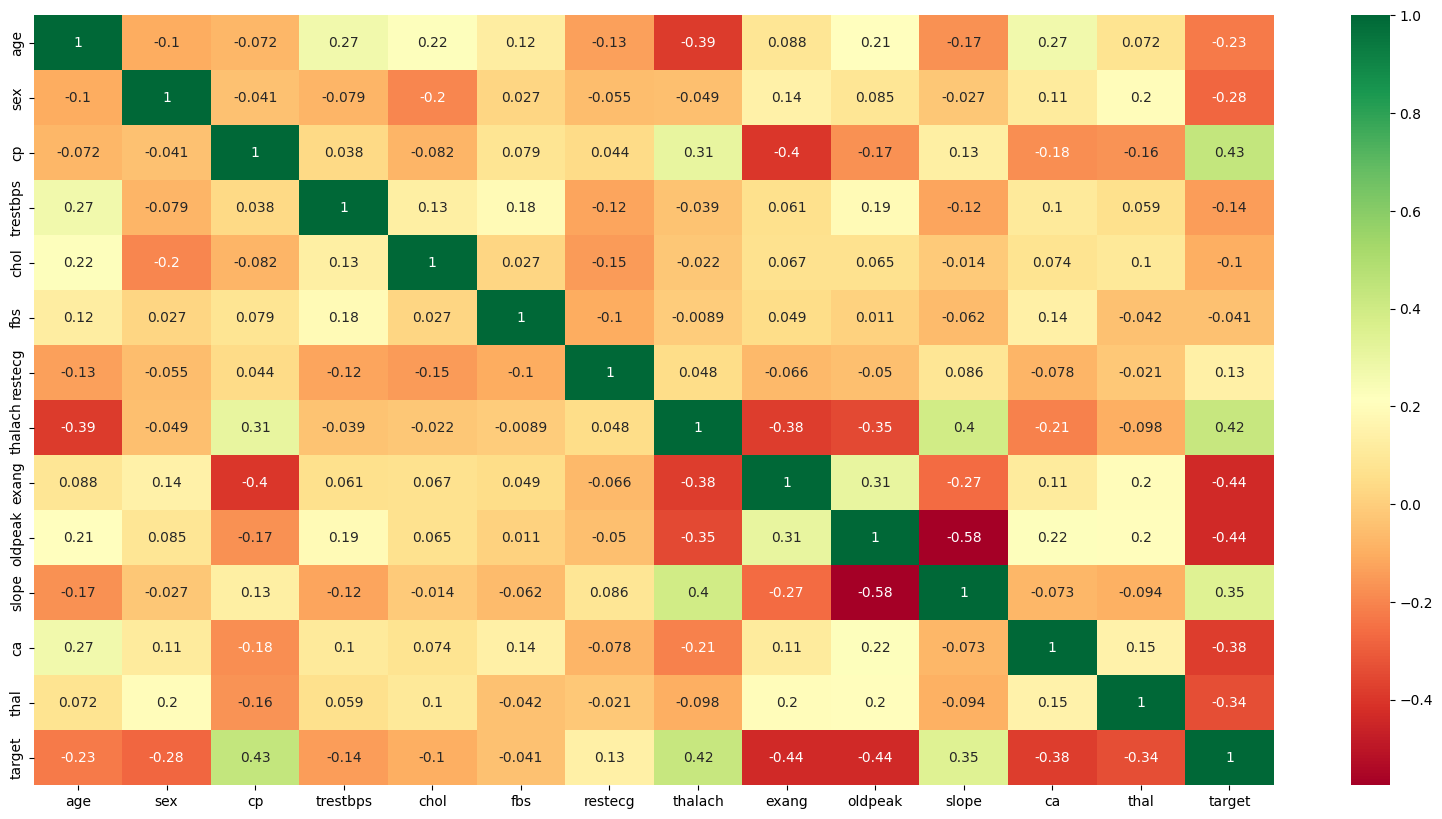

In [518]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")

Отталкиваясь от кореляционной карты можно сделать вывод, что признаки cp(тип боли в груди), thalach(максимальная частота сердечных сокращений) и slope(наклон пикового сегмента ST при нагрузке) имеют наибольшую корреляцию с целевым признаком target(наличие или отсутствие сердечного заболевания).

## При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).

Трансформируем категориальные признаки в количественные

In [519]:
cp_dum = pd.get_dummies(df['cp'], prefix = "cp")
thal_dum = pd.get_dummies(df['thal'], prefix = "thal")
slope_dum = pd.get_dummies(df['slope'], prefix = "slope")

frames = [df, cp_dum, thal_dum, slope_dum]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,0,125,212,0,1,168,0,1.0,...,0,0,0,0,0,0,1,0,0,1
1,53,1,0,140,203,1,0,155,1,3.1,...,0,0,0,0,0,0,1,1,0,0
2,70,1,0,145,174,0,1,125,1,2.6,...,0,0,0,0,0,0,1,1,0,0
3,61,1,0,148,203,0,1,161,0,0.0,...,0,0,0,0,0,0,1,0,0,1
4,62,0,0,138,294,1,1,106,0,1.9,...,0,0,0,0,0,1,0,0,1,0


Удалим теперь уже ненужные признаки

In [520]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,...,0,0,0,0,0,1,0,0,1,0


### Разделим данные на обучающую и тестовую выборки

In [521]:
from sklearn.model_selection import train_test_split

y = df["target"]
x = df.drop(columns=["target"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

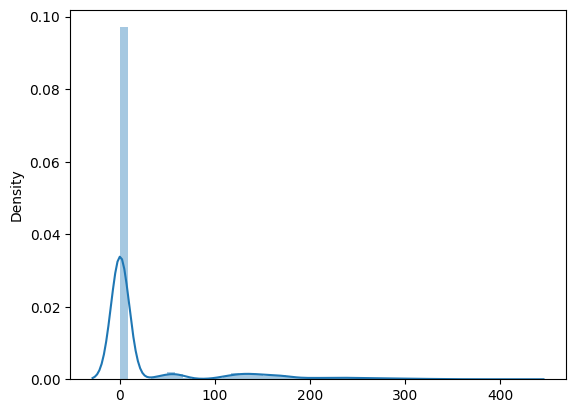

In [522]:
sns.distplot(x_train);

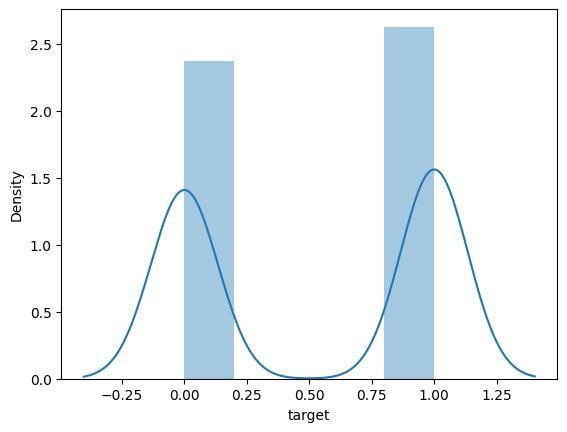

In [523]:
sns.distplot(y_train);

In [524]:
x_train

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
1020,59,1,140,221,0,1,164,1,0.0,0,...,1,0,0,0,0,1,0,0,0,1
479,58,1,128,216,0,0,131,1,2.2,3,...,0,0,0,0,0,0,1,0,1,0
227,44,0,118,242,0,1,149,0,0.3,1,...,0,1,0,0,0,1,0,0,1,0
910,50,1,140,233,0,1,163,0,0.6,1,...,0,1,0,0,0,0,1,0,1,0
362,43,0,122,213,0,1,165,0,0.2,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,41,1,130,214,0,0,168,0,2.0,0,...,0,1,0,0,0,1,0,0,1,0
71,61,1,140,207,0,0,138,1,1.9,1,...,0,0,0,0,0,0,1,0,0,1
106,51,1,140,299,0,1,173,1,1.6,0,...,0,0,0,0,0,0,1,0,0,1
270,43,1,110,211,0,1,161,0,0.0,0,...,0,0,0,0,0,0,1,0,0,1


In [525]:
x_test

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
527,62,0,124,209,0,1,163,0,0.0,0,...,0,0,0,0,0,1,0,0,0,1
359,53,0,128,216,0,0,115,0,0.0,0,...,0,1,0,1,0,0,0,0,0,1
447,55,1,160,289,0,0,145,1,0.8,1,...,0,0,0,0,0,0,1,0,1,0
31,50,0,120,244,0,1,162,0,1.1,0,...,1,0,0,0,0,1,0,0,0,1
621,48,1,130,256,1,0,150,1,0.0,2,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,29,1,130,204,0,0,202,0,0.0,0,...,1,0,0,0,0,1,0,0,0,1
239,62,0,150,244,0,1,154,1,1.4,0,...,0,0,0,0,0,1,0,0,1,0
312,70,1,160,269,0,1,112,1,2.9,1,...,0,1,0,0,0,0,1,0,1,0
211,67,1,100,299,0,0,125,1,0.9,2,...,0,0,0,0,0,1,0,0,1,0


In [526]:
y_train

1020    1
479     0
227     1
910     0
362     1
       ..
700     1
71      0
106     0
270     1
860     0
Name: target, Length: 717, dtype: int64

In [527]:
y_test

527    1
359    1
447    0
31     1
621    0
      ..
668    1
239    0
312    0
211    0
861    0
Name: target, Length: 308, dtype: int64

### Масштабирование данных

In [528]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [529]:
x_train_scaled

array([[ 0.5123,  0.6436,  0.4636, ..., -0.2708, -0.9286,  1.0649],
       [ 0.4022,  0.6436, -0.2188, ..., -0.2708,  1.0769, -0.9391],
       [-1.1383, -1.5538, -0.7876, ..., -0.2708,  1.0769, -0.9391],
       ...,
       [-0.368 ,  0.6436,  0.4636, ..., -0.2708, -0.9286,  1.0649],
       [-1.2483,  0.6436, -1.2426, ..., -0.2708, -0.9286,  1.0649],
       [-0.258 ,  0.6436, -1.1288, ..., -0.2708, -0.9286,  1.0649]])

In [530]:
x_test_scaled

array([[ 0.8424, -1.5538, -0.4463, ..., -0.2708, -0.9286,  1.0649],
       [-0.1479, -1.5538, -0.2188, ..., -0.2708, -0.9286,  1.0649],
       [ 0.0721,  0.6436,  1.6011, ..., -0.2708,  1.0769, -0.9391],
       ...,
       [ 1.7227,  0.6436,  1.6011, ..., -0.2708,  1.0769, -0.9391],
       [ 1.3926,  0.6436, -1.8113, ..., -0.2708,  1.0769, -0.9391],
       [ 1.0624,  0.6436,  0.4636, ..., -0.2708, -0.9286,  1.0649]])

### Подбор оптимальных признаков с помощью RFECV и кросс-валидация

In [531]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=StratifiedKFold(5), scoring='accuracy')
labelencoder = LabelEncoder()
y_transform = labelencoder.fit_transform(y_train)
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x.columns)
rfecv.fit(x_train_scaled_df, y_transform)

selected_features = list(x_train.columns[rfecv.support_])
print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % selected_features)

Optimal number of features: 13
Selected features: ['sex', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'ca', 'cp_0', 'cp_2', 'cp_3', 'thal_0', 'thal_3', 'slope_1']


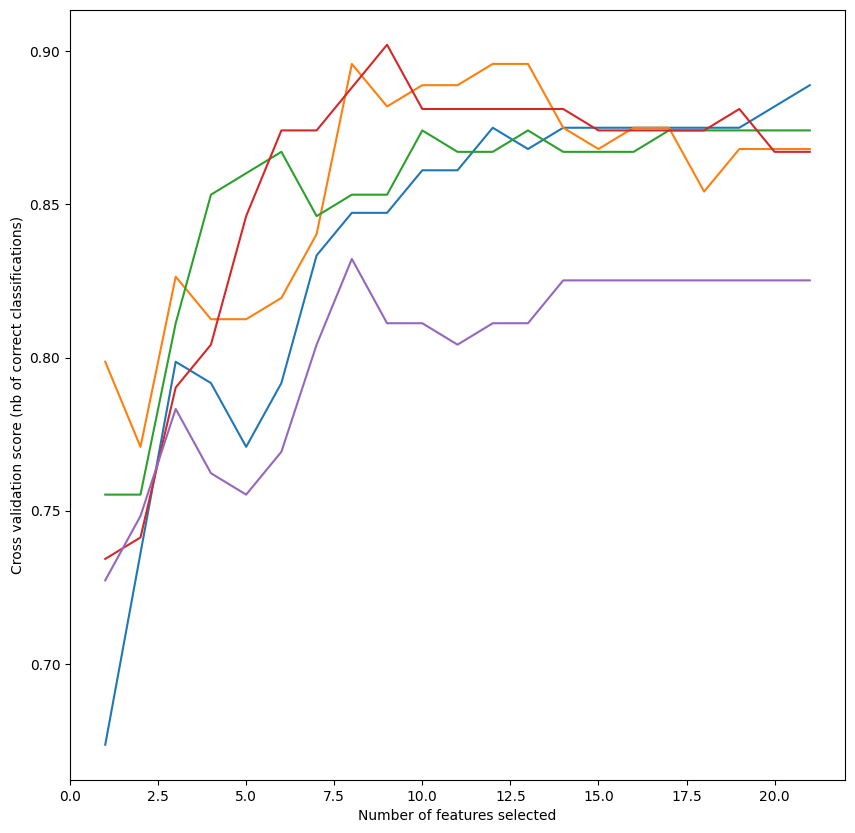

In [532]:
plt.figure(figsize=(10,10))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

## Самостоятельно реализовать один из методов классификации, с возможностью настройки гиперпараметров. KNN классификатор

In [756]:
scores, accuracies = {}, {}

In [757]:
from sklearn.base import ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array
import numpy as np


class KNN(ClassifierMixin):
    def __init__(self, k=3):
        self.k = k
        
    def get_params(self, deep=True):
        return {"k": self.k}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

    def fit(self, X, y):
            x, y = check_X_y(X, y)
            self.X = X
            self.y = y

# Calculate the Euclidean distance between two vectors    
    def euclidean_distance(self, row1, row2):
        distance = 0
        for i in range(len(row1) - 1):
            distance += (row1[i] - row2[i]) ** 2
        return np.sqrt(distance)
    
# Locate the most similar neighbors
    def get_neighbors(self, test_row):
        distances = []
        for i, train_row in enumerate(self.X):
            dist = self.euclidean_distance(test_row, train_row)
            distances.append((i, dist))
        distances.sort(key=lambda tupl: tupl[1])
        neighbors_indexes = list()
        for i in range(self.k):
            neighbors_indexes.append(distances[i][0])
        return neighbors_indexes
    
# Make a prediction with neighbors    
    def predict(self, X_test):
        X_test = check_array(X_test)
        predictions = []
        for test_row in X_test:
            neighbors_indexes = self.get_neighbors(test_row)
            top_neighbors = []
            for i in neighbors_indexes:
                top_neighbors.append(self.y[i])
            top_neighbors = max(set(top_neighbors), key=top_neighbors.count)
            predictions.append(top_neighbors)
        return predictions

In [758]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

my_knn_searcher = GridSearchCV(KNN(), [{"k": [3, 5, 7]}], cv=5, verbose=5)
my_knn_searcher = me_knn_searcher.fit(x_train_scaled, y_train)
print(my_knn_searcher.best_params_)
print("KNN score =", my_knn_searcher.best_score_)
scores['MY_KNN'] = my_knn_searcher.best_score_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ...............................k=3;, score=0.882 total time=   0.5s
[CV 2/5] END ...............................k=3;, score=0.889 total time=   0.5s
[CV 3/5] END ...............................k=3;, score=0.881 total time=   0.5s
[CV 4/5] END ...............................k=3;, score=0.895 total time=   0.5s
[CV 5/5] END ...............................k=3;, score=0.846 total time=   0.5s
[CV 1/5] END ...............................k=5;, score=0.882 total time=   0.6s
[CV 2/5] END ...............................k=5;, score=0.868 total time=   0.5s
[CV 3/5] END ...............................k=5;, score=0.902 total time=   0.5s
[CV 4/5] END ...............................k=5;, score=0.874 total time=   0.5s
[CV 5/5] END ...............................k=5;, score=0.797 total time=   0.5s
[CV 1/5] END ...............................k=7;, score=0.882 total time=   0.5s
[CV 2/5] END ...............................k=7;,

In [759]:
model = KNN(k = 3)
model.fit(x_train_scaled, y_train)
my_knn_prediction = model.predict(x_test_scaled)
print(f'KNN accuracy: {accuracy_score(y_test, my_knn_prediction)}')
accuracies['MY_KNN'] = accuracy_score(y_test, my_knn_prediction)

KNN accuracy: 0.935064935064935


## (+2 балла) Реализовать еще один из методов классификации и добавить его в сравнение.

In [760]:
class SVM(ClassifierMixin):
    def __init__(self, iters=100, learning_rate=0.001, verbose=True):
        self.iters = iters
        self.learning_rate = learning_rate
        self.verbose = verbose
        
    def get_params(self, deep=True):
        return {'iters': self.iters, 'learning_rate': self.learning_rate}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self    
        
    def fit(self, X, y):
        self.w, self.b = svm(X, y, self.iters, self.learning_rate, self.verbose)    
        
    def svm(self, X, y, iters, learning_rate, verbose=True):
        
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        y_ = np.where(y <= 0, -1, 1)
        for i in range(1, iters + 1):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.learning_rate * (2 * 1 / i * self.w)
                else:
                    self.w -= self.learning_rate * (2 * 1 / i * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.learning_rate * y_[idx]
        return self.w, self.b            
    
    

    def predict(self, X):
        linear_output = np.dot(X, self.w) - self.b
        labels = np.sign(linear_output)
        return np.where(labels <= -1, 0, 1)
        


In [761]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

my_cvm_searcher = GridSearchCV(SVM(), [{'iters': [100, 1000, 2000], 'learning_rate': [0.001, 0.01, 0.1], }], scoring='accuracy', cv=5, verbose=5) 
my_cvm_searcher.fit(x_train_scaled, y_train)
print(my_cvm_searcher.best_params_)
print("SVM score =", my_cvm_searcher.best_score_)
scores['MY_SVM'] = my_cvm_searcher.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
iteration: 100, num_iters: 100, lr: 0.001
[CV 1/5] END ....iters=100, learning_rate=0.001;, score=0.854 total time=   0.3s
iteration: 100, num_iters: 100, lr: 0.001
[CV 2/5] END ....iters=100, learning_rate=0.001;, score=0.854 total time=   0.2s
iteration: 100, num_iters: 100, lr: 0.001
[CV 3/5] END ....iters=100, learning_rate=0.001;, score=0.867 total time=   0.3s
iteration: 100, num_iters: 100, lr: 0.001
[CV 4/5] END ....iters=100, learning_rate=0.001;, score=0.874 total time=   0.2s
iteration: 100, num_iters: 100, lr: 0.001
[CV 5/5] END ....iters=100, learning_rate=0.001;, score=0.818 total time=   0.2s
iteration: 100, num_iters: 100, lr: 0.01
[CV 1/5] END .....iters=100, learning_rate=0.01;, score=0.868 total time=   0.2s
iteration: 100, num_iters: 100, lr: 0.01
[CV 2/5] END .....iters=100, learning_rate=0.01;, score=0.861 total time=   0.2s
iteration: 100, num_iters: 100, lr: 0.01
[CV 3/5] END .....iters=100, learning_ra

iteration: 800, num_iters: 1000, lr: 0.1
iteration: 900, num_iters: 1000, lr: 0.1
iteration: 1000, num_iters: 1000, lr: 0.1
[CV 3/5] END .....iters=1000, learning_rate=0.1;, score=0.832 total time=   2.9s
iteration: 100, num_iters: 1000, lr: 0.1
iteration: 200, num_iters: 1000, lr: 0.1
iteration: 300, num_iters: 1000, lr: 0.1
iteration: 400, num_iters: 1000, lr: 0.1
iteration: 500, num_iters: 1000, lr: 0.1
iteration: 600, num_iters: 1000, lr: 0.1
iteration: 700, num_iters: 1000, lr: 0.1
iteration: 800, num_iters: 1000, lr: 0.1
iteration: 900, num_iters: 1000, lr: 0.1
iteration: 1000, num_iters: 1000, lr: 0.1
[CV 4/5] END .....iters=1000, learning_rate=0.1;, score=0.881 total time=   2.9s
iteration: 100, num_iters: 1000, lr: 0.1
iteration: 200, num_iters: 1000, lr: 0.1
iteration: 300, num_iters: 1000, lr: 0.1
iteration: 400, num_iters: 1000, lr: 0.1
iteration: 500, num_iters: 1000, lr: 0.1
iteration: 600, num_iters: 1000, lr: 0.1
iteration: 700, num_iters: 1000, lr: 0.1
iteration: 800, 

iteration: 1100, num_iters: 2000, lr: 0.01
iteration: 1200, num_iters: 2000, lr: 0.01
iteration: 1300, num_iters: 2000, lr: 0.01
iteration: 1400, num_iters: 2000, lr: 0.01
iteration: 1500, num_iters: 2000, lr: 0.01
iteration: 1600, num_iters: 2000, lr: 0.01
iteration: 1700, num_iters: 2000, lr: 0.01
iteration: 1800, num_iters: 2000, lr: 0.01
iteration: 1900, num_iters: 2000, lr: 0.01
iteration: 2000, num_iters: 2000, lr: 0.01
[CV 3/5] END ....iters=2000, learning_rate=0.01;, score=0.867 total time=   6.2s
iteration: 100, num_iters: 2000, lr: 0.01
iteration: 200, num_iters: 2000, lr: 0.01
iteration: 300, num_iters: 2000, lr: 0.01
iteration: 400, num_iters: 2000, lr: 0.01
iteration: 500, num_iters: 2000, lr: 0.01
iteration: 600, num_iters: 2000, lr: 0.01
iteration: 700, num_iters: 2000, lr: 0.01
iteration: 800, num_iters: 2000, lr: 0.01
iteration: 900, num_iters: 2000, lr: 0.01
iteration: 1000, num_iters: 2000, lr: 0.01
iteration: 1100, num_iters: 2000, lr: 0.01
iteration: 1200, num_iter

In [764]:
model = SVM(iters=1000, learning_rate=0.001)
model.fit(x_train_scaled, y_train)
my_svm_prediction = model.predict(x_test_scaled)
print(f'SVM accuracy: {accuracy_score(y_test, my_svm_prediction)}')
accuracies['MY_SVM'] = accuracy_score(y_test, my_svm_prediction)

iteration: 100, num_iters: 1000, lr: 0.001
iteration: 200, num_iters: 1000, lr: 0.001
iteration: 300, num_iters: 1000, lr: 0.001
iteration: 400, num_iters: 1000, lr: 0.001
iteration: 500, num_iters: 1000, lr: 0.001
iteration: 600, num_iters: 1000, lr: 0.001
iteration: 700, num_iters: 1000, lr: 0.001
iteration: 800, num_iters: 1000, lr: 0.001
iteration: 900, num_iters: 1000, lr: 0.001
iteration: 1000, num_iters: 1000, lr: 0.001
SVM accuracy: 0.8116883116883117


## Повторить предыдущий пункт для библиотечных реализаций (например, из sklearn) всех пройденных методов классификации (logistic regression, svm, knn, naive bayes, decision tree).

### Logistic Regression

In [765]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr_searcher = GridSearchCV(LogisticRegression(), [{'C': [0.001, 0.01, 0.1]}], cv=5, verbose=5)
lr_searcher.fit(x_train_scaled, y_train)
print(lr_searcher.best_params_)
print("Logistic Regression score =", lr_searcher.best_score_)
scores['LR'] = lr_searcher.best_score_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ...........................C=0.001;, score=0.854 total time=   0.0s
[CV 2/5] END ...........................C=0.001;, score=0.833 total time=   0.0s
[CV 3/5] END ...........................C=0.001;, score=0.853 total time=   0.0s
[CV 4/5] END ...........................C=0.001;, score=0.860 total time=   0.0s
[CV 5/5] END ...........................C=0.001;, score=0.846 total time=   0.0s
[CV 1/5] END ............................C=0.01;, score=0.861 total time=   0.0s
[CV 2/5] END ............................C=0.01;, score=0.854 total time=   0.0s
[CV 3/5] END ............................C=0.01;, score=0.853 total time=   0.0s
[CV 4/5] END ............................C=0.01;, score=0.860 total time=   0.0s
[CV 5/5] END ............................C=0.01;, score=0.839 total time=   0.0s
[CV 1/5] END .............................C=0.1;, score=0.889 total time=   0.0s
[CV 2/5] END .............................C=0.1;,

In [766]:
model = LogisticRegression(C = 0.1)
model.fit(x_train_scaled, y_train)
lr_prediction = model.predict(x_test_scaled)
print(f'Logistic Regression accuracy: {accuracy_score(y_test, lr_prediction)}')
accuracies['LR'] = accuracy_score(y_test, lr_prediction)

Logistic Regression accuracy: 0.8116883116883117


## KNN

In [769]:
from sklearn.neighbors import KNeighborsClassifier

knn_searcher = GridSearchCV(KNeighborsClassifier(), [{'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}], cv=5, verbose=5)
knn_searcher.fit(x_train_scaled, y_train)
print(knn_searcher.best_params_)
print("KNN score =", knn_searcher.best_score_)
scores['KNN'] = knn_searcher.best_score_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.882 total time=   0.0s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.875 total time=   0.0s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.888 total time=   0.0s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.881 total time=   0.0s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.860 total time=   0.0s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.965 total time=   0.0s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.958 total time=   0.0s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.993 total time=   0.0s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.986 total time=   0.0s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.930 total time=   0.0s
[CV 1/5] END ....n_neighbors=5, weights=uniform;, score=0.868 total time=   0.0s
[CV 2/5] END ....n_neighbors=5, weights=uniform;,

In [770]:
model = KNeighborsClassifier(n_neighbors = 7, weights = 'distance')
model.fit(x_train_scaled, y_train)
knn_prediction = model.predict(x_test_scaled)
print(f'KNN accuracy: {accuracy_score(y_test, knn_prediction)}')
accuracies['KNN'] = accuracy_score(y_test, knn_prediction)

KNN accuracy: 0.9805194805194806


### SVM

In [767]:
from sklearn.svm import SVC

svm_searcher = GridSearchCV(SVC(), [{'C': [0.0001, 0.01, 0.1], 'kernel': ['linear', 'rbf', 'sigmoid']}], cv=5, verbose=5)
svm_searcher.fit(x_train_scaled, y_train)
print(svm_searcher.best_params_)
print("SVM score =", svm_searcher.best_score_)
scores['SVM'] = svm_searcher.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ...........C=0.0001, kernel=linear;, score=0.528 total time=   0.0s
[CV 2/5] END ...........C=0.0001, kernel=linear;, score=0.528 total time=   0.0s
[CV 3/5] END ...........C=0.0001, kernel=linear;, score=0.524 total time=   0.0s
[CV 4/5] END ...........C=0.0001, kernel=linear;, score=0.524 total time=   0.0s
[CV 5/5] END ...........C=0.0001, kernel=linear;, score=0.524 total time=   0.0s
[CV 1/5] END ..............C=0.0001, kernel=rbf;, score=0.528 total time=   0.0s
[CV 2/5] END ..............C=0.0001, kernel=rbf;, score=0.528 total time=   0.0s
[CV 3/5] END ..............C=0.0001, kernel=rbf;, score=0.524 total time=   0.0s
[CV 4/5] END ..............C=0.0001, kernel=rbf;, score=0.524 total time=   0.0s
[CV 5/5] END ..............C=0.0001, kernel=rbf;, score=0.524 total time=   0.0s
[CV 1/5] END ..........C=0.0001, kernel=sigmoid;, score=0.528 total time=   0.0s
[CV 2/5] END ..........C=0.0001, kernel=sigmoid;,

In [768]:
model = SVC(C = 0.1, kernel = 'rbf')
model.fit(x_train_scaled, y_train)
svm_prediction = model.predict(x_test_scaled)
print(f'SVM accuracy: {accuracy_score(y_test, svm_prediction)}')
accuracies['SVM'] = accuracy_score(y_test, svm_prediction)

SVM accuracy: 0.8214285714285714


### Naive Bayes


In [771]:
from sklearn.naive_bayes import GaussianNB

nb_searcher = GridSearchCV(GaussianNB(), [{"priors": [[0.75, 0.25], [0.33, 0.67]],"var_smoothing": np.logspace(0, -10, num=100)}], cv=5, verbose=5)
nb_searcher.fit(x_train_scaled, y_train)
print(nb_searcher.best_params_)
print("Naive Bayes score =", nb_searcher.best_score_)
scores['NB'] = nb_searcher.best_score_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV 1/5] END priors=[0.75, 0.25], var_smoothing=1.0;, score=0.854 total time=   0.0s
[CV 2/5] END priors=[0.75, 0.25], var_smoothing=1.0;, score=0.833 total time=   0.0s
[CV 3/5] END priors=[0.75, 0.25], var_smoothing=1.0;, score=0.853 total time=   0.0s
[CV 4/5] END priors=[0.75, 0.25], var_smoothing=1.0;, score=0.839 total time=   0.0s
[CV 5/5] END priors=[0.75, 0.25], var_smoothing=1.0;, score=0.825 total time=   0.0s
[CV 1/5] END priors=[0.75, 0.25], var_smoothing=0.7924828983539173;, score=0.861 total time=   0.0s
[CV 2/5] END priors=[0.75, 0.25], var_smoothing=0.7924828983539173;, score=0.826 total time=   0.0s
[CV 3/5] END priors=[0.75, 0.25], var_smoothing=0.7924828983539173;, score=0.853 total time=   0.0s
[CV 4/5] END priors=[0.75, 0.25], var_smoothing=0.7924828983539173;, score=0.839 total time=   0.0s
[CV 5/5] END priors=[0.75, 0.25], var_smoothing=0.7924828983539173;, score=0.832 total time=   0.0s
[CV 1/5] EN

[CV 3/5] END priors=[0.75, 0.25], var_smoothing=0.0001830738280295368;, score=0.832 total time=   0.0s
[CV 4/5] END priors=[0.75, 0.25], var_smoothing=0.0001830738280295368;, score=0.825 total time=   0.0s
[CV 5/5] END priors=[0.75, 0.25], var_smoothing=0.0001830738280295368;, score=0.825 total time=   0.0s
[CV 1/5] END priors=[0.75, 0.25], var_smoothing=0.000145082877849594;, score=0.840 total time=   0.0s
[CV 2/5] END priors=[0.75, 0.25], var_smoothing=0.000145082877849594;, score=0.819 total time=   0.0s
[CV 3/5] END priors=[0.75, 0.25], var_smoothing=0.000145082877849594;, score=0.832 total time=   0.0s
[CV 4/5] END priors=[0.75, 0.25], var_smoothing=0.000145082877849594;, score=0.832 total time=   0.0s
[CV 5/5] END priors=[0.75, 0.25], var_smoothing=0.000145082877849594;, score=0.825 total time=   0.0s
[CV 1/5] END priors=[0.75, 0.25], var_smoothing=0.00011497569953977356;, score=0.840 total time=   0.0s
[CV 2/5] END priors=[0.75, 0.25], var_smoothing=0.00011497569953977356;, scor

[CV 4/5] END priors=[0.75, 0.25], var_smoothing=2.6560877829466893e-08;, score=0.762 total time=   0.0s
[CV 5/5] END priors=[0.75, 0.25], var_smoothing=2.6560877829466893e-08;, score=0.825 total time=   0.0s
[CV 1/5] END priors=[0.75, 0.25], var_smoothing=2.104904144512022e-08;, score=0.778 total time=   0.0s
[CV 2/5] END priors=[0.75, 0.25], var_smoothing=2.104904144512022e-08;, score=0.771 total time=   0.0s
[CV 3/5] END priors=[0.75, 0.25], var_smoothing=2.104904144512022e-08;, score=0.776 total time=   0.0s
[CV 4/5] END priors=[0.75, 0.25], var_smoothing=2.104904144512022e-08;, score=0.762 total time=   0.0s
[CV 5/5] END priors=[0.75, 0.25], var_smoothing=2.104904144512022e-08;, score=0.825 total time=   0.0s
[CV 1/5] END priors=[0.75, 0.25], var_smoothing=1.6681005372000592e-08;, score=0.778 total time=   0.0s
[CV 2/5] END priors=[0.75, 0.25], var_smoothing=1.6681005372000592e-08;, score=0.771 total time=   0.0s
[CV 3/5] END priors=[0.75, 0.25], var_smoothing=1.6681005372000592e-0

[CV 2/5] END priors=[0.33, 0.67], var_smoothing=0.0774263682681127;, score=0.840 total time=   0.0s
[CV 3/5] END priors=[0.33, 0.67], var_smoothing=0.0774263682681127;, score=0.832 total time=   0.0s
[CV 4/5] END priors=[0.33, 0.67], var_smoothing=0.0774263682681127;, score=0.839 total time=   0.0s
[CV 5/5] END priors=[0.33, 0.67], var_smoothing=0.0774263682681127;, score=0.846 total time=   0.0s
[CV 1/5] END priors=[0.33, 0.67], var_smoothing=0.06135907273413173;, score=0.847 total time=   0.0s
[CV 2/5] END priors=[0.33, 0.67], var_smoothing=0.06135907273413173;, score=0.840 total time=   0.0s
[CV 3/5] END priors=[0.33, 0.67], var_smoothing=0.06135907273413173;, score=0.832 total time=   0.0s
[CV 4/5] END priors=[0.33, 0.67], var_smoothing=0.06135907273413173;, score=0.839 total time=   0.0s
[CV 5/5] END priors=[0.33, 0.67], var_smoothing=0.06135907273413173;, score=0.846 total time=   0.0s
[CV 1/5] END priors=[0.33, 0.67], var_smoothing=0.04862601580065353;, score=0.847 total time=  

[CV 3/5] END priors=[0.33, 0.67], var_smoothing=1.4174741629268048e-05;, score=0.776 total time=   0.0s
[CV 4/5] END priors=[0.33, 0.67], var_smoothing=1.4174741629268048e-05;, score=0.769 total time=   0.0s
[CV 5/5] END priors=[0.33, 0.67], var_smoothing=1.4174741629268048e-05;, score=0.846 total time=   0.0s
[CV 1/5] END priors=[0.33, 0.67], var_smoothing=1.1233240329780266e-05;, score=0.806 total time=   0.0s
[CV 2/5] END priors=[0.33, 0.67], var_smoothing=1.1233240329780266e-05;, score=0.778 total time=   0.0s
[CV 3/5] END priors=[0.33, 0.67], var_smoothing=1.1233240329780266e-05;, score=0.776 total time=   0.0s
[CV 4/5] END priors=[0.33, 0.67], var_smoothing=1.1233240329780266e-05;, score=0.776 total time=   0.0s
[CV 5/5] END priors=[0.33, 0.67], var_smoothing=1.1233240329780266e-05;, score=0.846 total time=   0.0s
[CV 1/5] END priors=[0.33, 0.67], var_smoothing=8.902150854450392e-06;, score=0.806 total time=   0.0s
[CV 2/5] END priors=[0.33, 0.67], var_smoothing=8.902150854450392

[CV 1/5] END priors=[0.33, 0.67], var_smoothing=2.595024211399732e-09;, score=0.757 total time=   0.0s
[CV 2/5] END priors=[0.33, 0.67], var_smoothing=2.595024211399732e-09;, score=0.688 total time=   0.0s
[CV 3/5] END priors=[0.33, 0.67], var_smoothing=2.595024211399732e-09;, score=0.713 total time=   0.0s
[CV 4/5] END priors=[0.33, 0.67], var_smoothing=2.595024211399732e-09;, score=0.671 total time=   0.0s
[CV 5/5] END priors=[0.33, 0.67], var_smoothing=2.595024211399732e-09;, score=0.846 total time=   0.0s
[CV 1/5] END priors=[0.33, 0.67], var_smoothing=2.0565123083486515e-09;, score=0.750 total time=   0.0s
[CV 2/5] END priors=[0.33, 0.67], var_smoothing=2.0565123083486515e-09;, score=0.688 total time=   0.0s
[CV 3/5] END priors=[0.33, 0.67], var_smoothing=2.0565123083486515e-09;, score=0.713 total time=   0.0s
[CV 4/5] END priors=[0.33, 0.67], var_smoothing=2.0565123083486515e-09;, score=0.664 total time=   0.0s
[CV 5/5] END priors=[0.33, 0.67], var_smoothing=2.0565123083486515e-0

In [772]:
model = GaussianNB(priors = [0.75, 0.25], var_smoothing = 0.0774263682681127)
model.fit(x_train_scaled, y_train)
nb_prediction = model.predict(x_test_scaled)
print(f'Naive Bayes accuracy: {accuracy_score(y_test, nb_prediction)}')
accuracies['NB'] = accuracy_score(y_test, nb_prediction)

Naive Bayes accuracy: 0.8181818181818182


### Decision Tree

In [773]:
from sklearn.tree import DecisionTreeClassifier

dt_searcher = GridSearchCV(DecisionTreeClassifier(), [{'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}], cv=5, verbose=5)
dt_searcher.fit(x_train_scaled, y_train)
print(dt_searcher.best_params_)
print("Decision Tree score =", dt_searcher.best_score_)
scores['DT'] = dt_searcher.best_score_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .......criterion=gini, max_depth=1;, score=0.792 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=1;, score=0.771 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=1;, score=0.776 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=1;, score=0.783 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=1;, score=0.755 total time=   0.0s
[CV 1/5] END .......criterion=gini, max_depth=2;, score=0.736 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=2;, score=0.771 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=2;, score=0.790 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=2;, score=0.769 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=2;, score=0.671 total time=   0.0s
[CV 1/5] END .......criterion=gini, max_depth=3;, score=0.806 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=3

In [774]:
model = DecisionTreeClassifier(criterion = 'gini', max_depth = 10)
model.fit(x_train_scaled, y_train)
dt_prediction = model.predict(x_test_scaled)
print(f'Decision Tree accuracy: {accuracy_score(y_test, dt_prediction)}')
accuracies['DT'] = accuracy_score(y_test, dt_prediction)

Decision Tree accuracy: 0.9805194805194806


## Сравнение обученных моделей

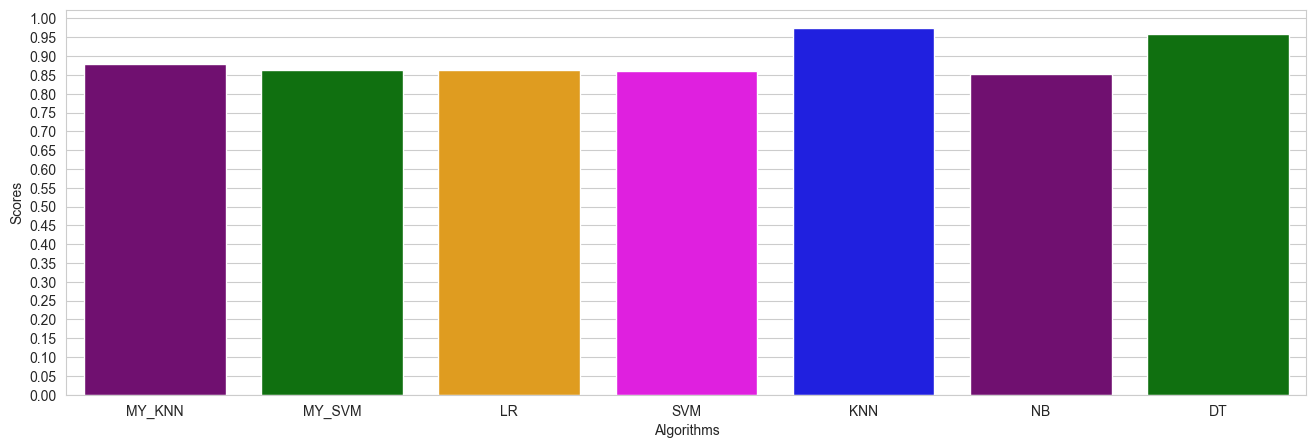

In [784]:
colors = ["purple", "green", "orange", "magenta", "blue"]
sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.ylabel("Scores")
plt.xlabel("Algorithms")
plt.yticks(np.arange(0, 1.05, 0.05))
sns.barplot(x=list(scores.keys()), y=list(scores.values()), palette=colors)
plt.show()

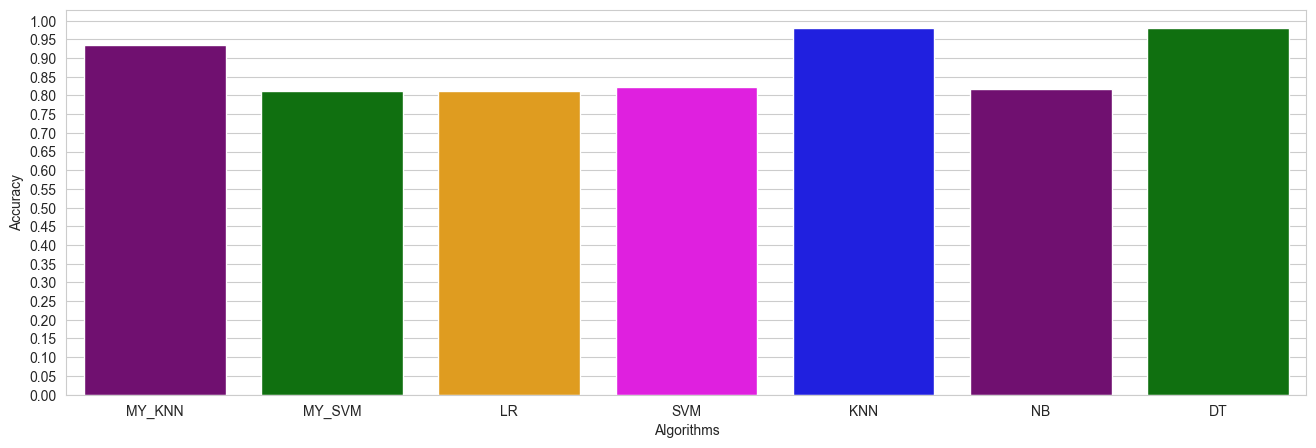

In [785]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
plt.yticks(np.arange(0, 1.05, 0.05))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

## Сравнить все обученные модели, построить их confusion matrices. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.

In [786]:
from sklearn.metrics import confusion_matrix

cm_my_knn = confusion_matrix(y_test, my_knn_prediction)
cm_my_svm = confusion_matrix(y_test, my_svm_prediction)
cm_lr = confusion_matrix(y_test, lr_prediction)
cm_knn = confusion_matrix(y_test, knn_prediction)
cm_svm = confusion_matrix(y_test, svm_prediction)
cm_nb = confusion_matrix(y_test, nb_prediction)
cm_dt = confusion_matrix(y_test, dt_prediction)

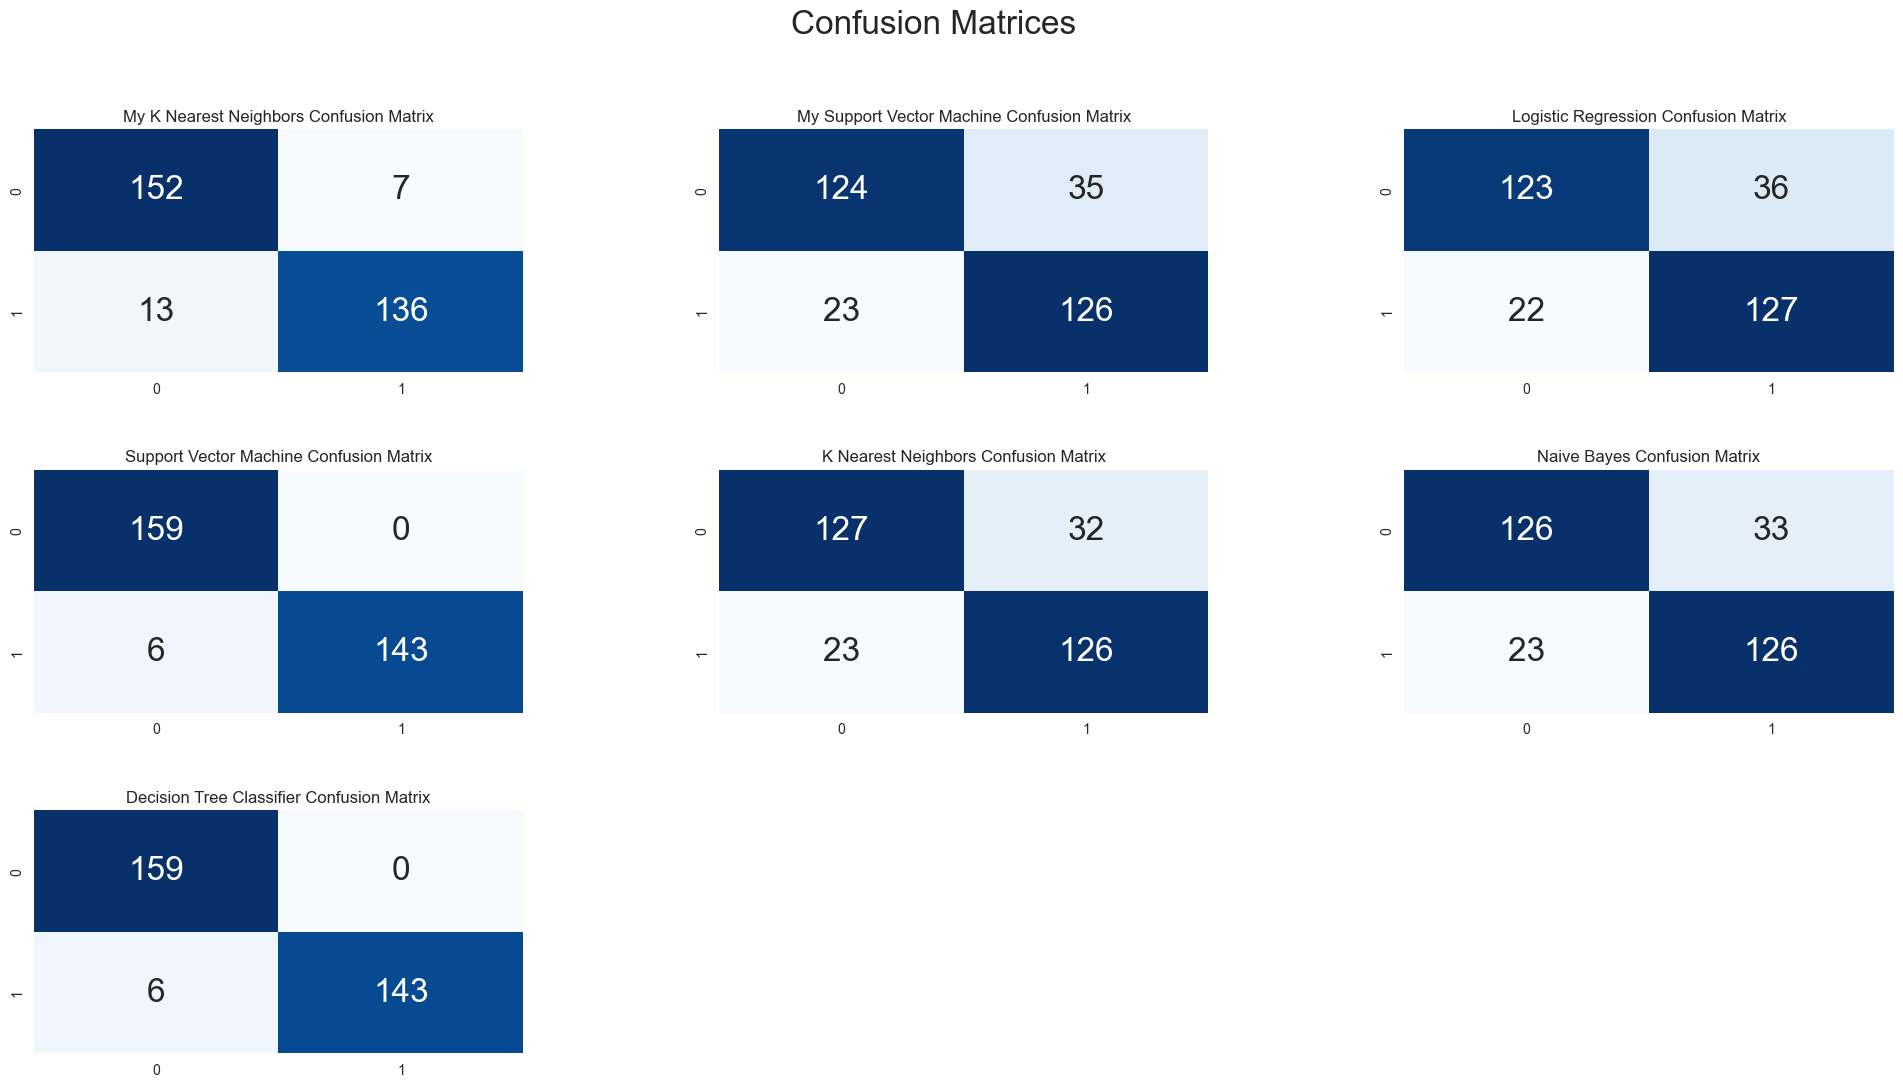

In [787]:
plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrices", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(3,3,1)
plt.title("My K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_my_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,2)
plt.title("My Support Vector Machine Confusion Matrix")
sns.heatmap(cm_my_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,3)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,4)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,5)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,6)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,7)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dt,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.show()

 Лучшими моделями на предложенной выборке являются классификаторы K Nearest Neighbors, Support Vector Machine и Decision Tree Classifier
 Собственная реализация K Nearest Neighbors показала очень хороший результат


## (+2 балла) Найти данные, на которых интересно будет решать задачу классификации. Повторить все пункты задания на новых данных.

В качестве второго набора данных рассмотрим  датасет с информацией о диабете. Датасет взят с kaggle [ссылка](https://www.kaggle.com/datasets/jillanisofttech/diabetes-disease-updated-dataset).

In [790]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [791]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Описание набора данных
- **Pregnancies** - Количество беременностей
- **Glucose** - Концентрация глюкозы в плазме через 2 часа при пероральном тесте на толерантность к глюкозе
- **BloodPressure** - Диастолическое артериальное давление (мм рт.ст.) 
- **SkinThickness** - Толщина кожной складки трицепса (мм)
-  **Insulin** - Инсулин сыворотки за 2 часа (мЕд/мл)
- **BMI** - Индекс массы тела (вес в кг/(рост в м)^2)
- **DiabetesPedigreeFunction** - Функция родословной диабета
- **Age** - Возраст (лет)
- **Outcome** - Результат (0 - отсутствие диабета или 1 - присутствие диабета) - **ЦЕЛЕВОЙ ПРИЗНАК**

In [793]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Пропущенные значения в датасете отсутствуют

In [794]:
df.shape

(768, 9)

Дополнительная чистка данных не требуется.

## Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.

Определим количество людей с наличием или отсутствием диабета

In [796]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

У 500 человек отсутствует диабет, у 268 имеется диабет

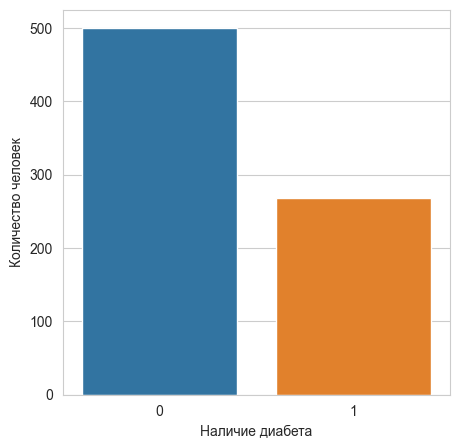

In [799]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x="Outcome")
plt.ylabel('Количество человек');
plt.xlabel('Наличие диабета');

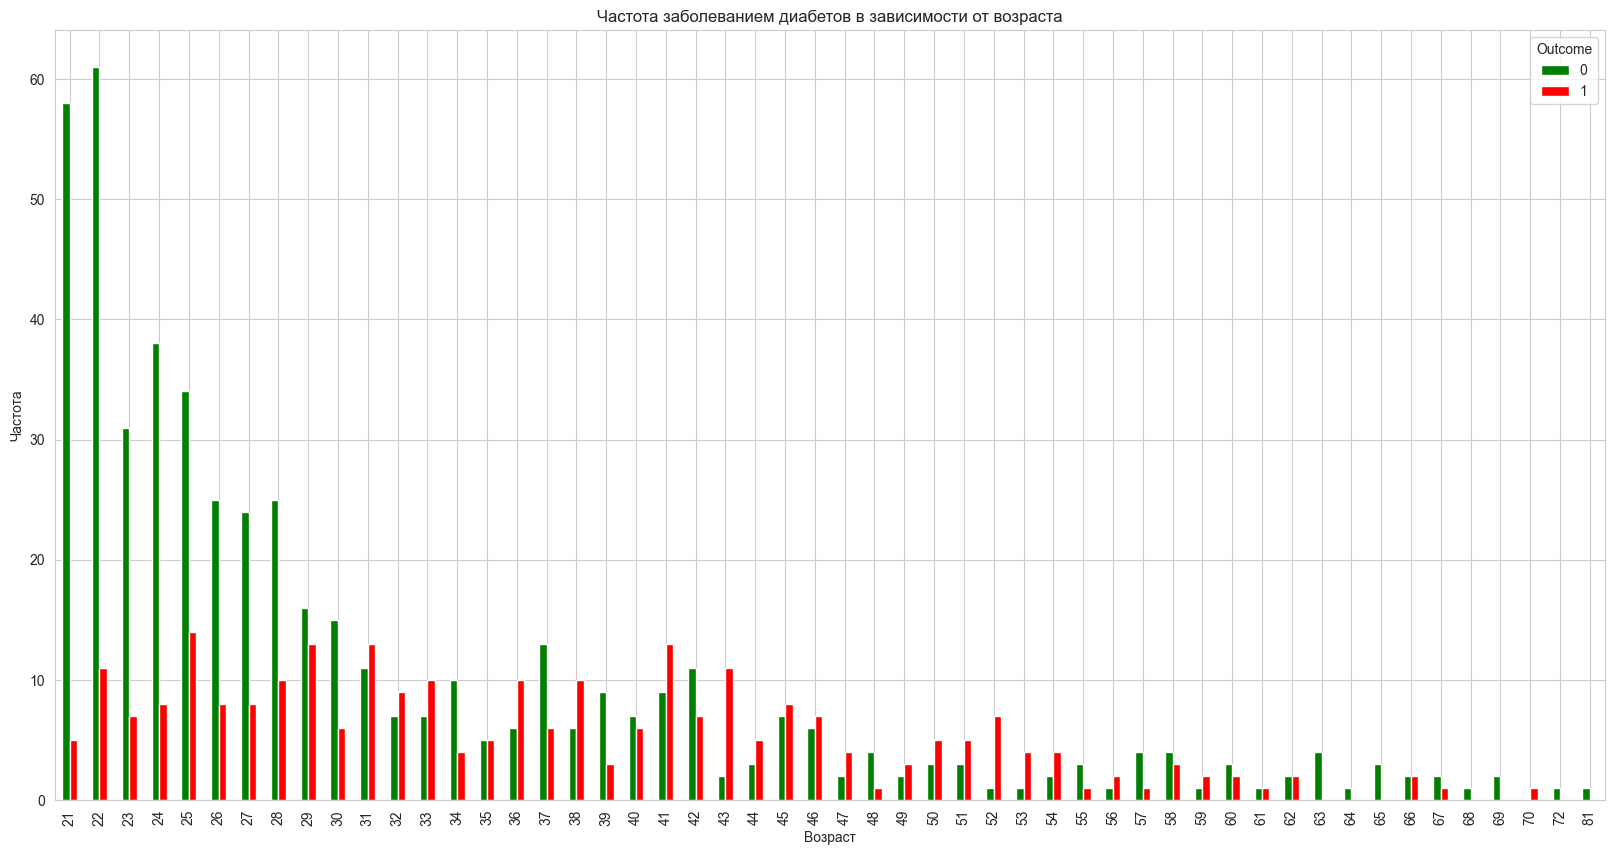

In [800]:
pd.crosstab(df.Age,df.Outcome).plot(kind="bar", figsize=(20, 10), color=['green','red'])
plt.title('Частота заболеванием диабетов в зависимости от возраста')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

In [801]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Из графика видно, что у людей в возрасте от 25 до 30 лет диабеом заболевают реже, но всё же имеются больные. Заболевание диабетом скорее всего не зависит от возраста, а от других факторов, к примеру такого как Insulin (Инсулин сыворотки за 2 часа (мЕд/мл)) и от признака Glucose (Концентрация глюкозы в плазме через 2 часа при пероральном тесте на толерантность к глюкозе). Люди с повышенными Insulin и Glucose болеют диабетом чаще.

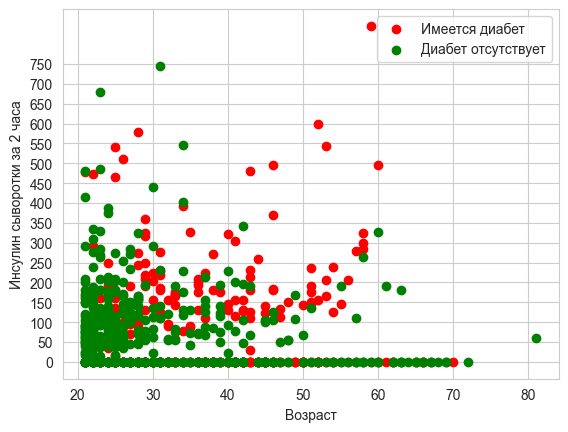

In [804]:
plt.scatter(x=df.Age[df.Outcome==1], y=df.Insulin[(df.Outcome==1)], c="red")
plt.scatter(x=df.Age[df.Outcome==0], y=df.Insulin[(df.Outcome==0)], c="green")
plt.legend(["Имеется диабет", "Диабет отсутствует"])
plt.xlabel("Возраст")
plt.ylabel("Инсулин сыворотки за 2 часа")
plt.yticks(np.arange(0, 800, 50))
plt.show()

Из графика видно, что диабет чаще встречается при инсулине сыворотки выше 100

<AxesSubplot: >

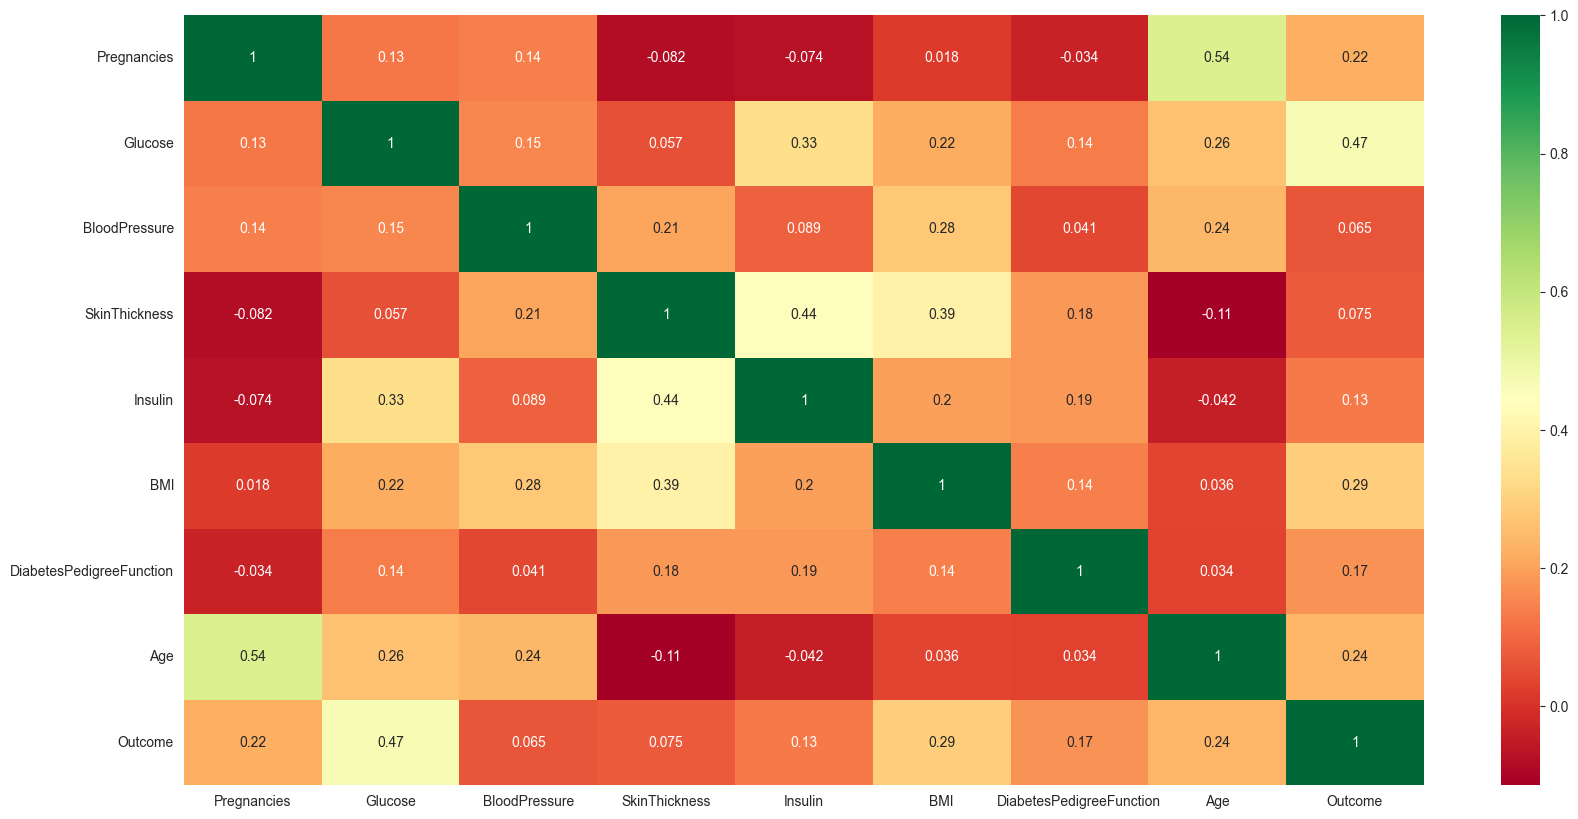

In [802]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")

Отталкиваясь от кореляционной карты можно сделать вывод, что признаки Pregnancies и Age) имеют наибольшую корреляцию с целевым признаком Outcome.

## При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).

Преобразованиеи клининг данных не требуется

### Разделим данные на обучающую и тестовую выборки

In [806]:
y = df["Outcome"]
x = df.drop(columns=["Outcome"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

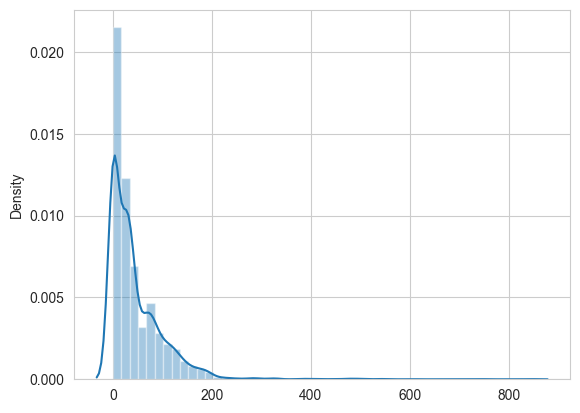

In [807]:
sns.distplot(x_train);

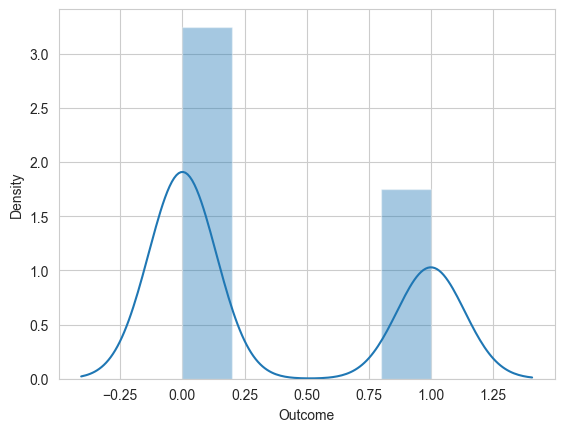

In [808]:
sns.distplot(y_train);

### Масштабирование данных

In [809]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [810]:
x_train_scaled

array([[-0.8363, -0.8001, -0.5358, ..., -1.0602, -0.6142, -0.9486],
       [ 0.3907, -0.4905,  0.128 , ...,  0.6465, -0.9097, -0.4347],
       [-1.143 ,  0.438 , -0.0932, ...,  1.3554, -0.307 , -0.7773],
       ...,
       [ 1.9245, -0.6143,  0.9025, ...,  1.7886,  1.9489,  0.4219],
       [-1.143 ,  0.6237, -3.8548, ...,  1.3685, -0.7751, -0.349 ],
       [-1.143 ,  0.1285,  1.4557, ..., -1.2439, -0.6084, -1.0343]])

In [811]:
x_test_scaled

array([[ 0.6975, -0.7072, -0.6464, ...,  0.2658, -0.1168,  0.8502],
       [-0.5295, -0.2739,  0.294 , ...,  0.4889, -0.9419, -1.0343],
       [-0.5295, -0.3977, -0.3145, ..., -0.1543, -0.9127, -1.0343],
       ...,
       [-1.143 ,  0.1904,  0.5706, ...,  0.5677,  0.9775, -0.863 ],
       [ 0.6975, -0.4905,  0.0174, ..., -0.1543, -1.018 ,  0.3362],
       [ 0.3907, -1.3572,  0.6812, ...,  0.5021, -0.9185,  0.1649]])

### Подбор оптимальных признаков с помощью RFEC и кросс-валидация

In [812]:
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=StratifiedKFold(5), scoring='accuracy')
labelencoder = LabelEncoder()
y_transform = labelencoder.fit_transform(y_train)
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x.columns)
rfecv.fit(x_train_scaled_df, y_transform)

selected_features = list(x_train.columns[rfecv.support_])
print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % selected_features)

Optimal number of features: 3
Selected features: ['Glucose', 'BMI', 'Age']


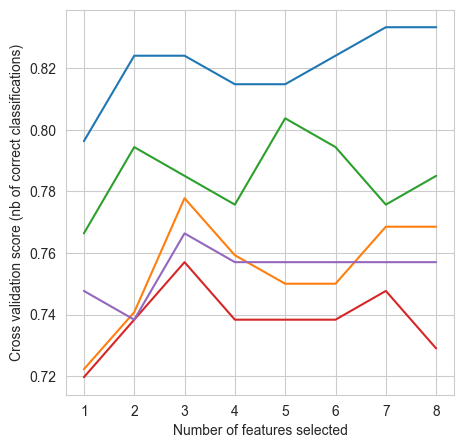

In [814]:
plt.figure(figsize=(5,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

### Собственная реализация KNN классификатора

In [818]:
scores, accuracies = {}, {}

In [819]:
my_knn_searcher = GridSearchCV(KNN(), [{"k": [3, 5, 7]}], cv=5, verbose=5)
my_knn_searcher = me_knn_searcher.fit(x_train_scaled, y_train)
print(my_knn_searcher.best_params_)
print("KNN score =", my_knn_searcher.best_score_)
scores['MY_KNN'] = my_knn_searcher.best_score_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ...............................k=3;, score=0.787 total time=   0.1s
[CV 2/5] END ...............................k=3;, score=0.741 total time=   0.1s
[CV 3/5] END ...............................k=3;, score=0.710 total time=   0.1s
[CV 4/5] END ...............................k=3;, score=0.766 total time=   0.1s
[CV 5/5] END ...............................k=3;, score=0.692 total time=   0.1s
[CV 1/5] END ...............................k=5;, score=0.796 total time=   0.1s
[CV 2/5] END ...............................k=5;, score=0.759 total time=   0.1s
[CV 3/5] END ...............................k=5;, score=0.720 total time=   0.1s
[CV 4/5] END ...............................k=5;, score=0.776 total time=   0.1s
[CV 5/5] END ...............................k=5;, score=0.729 total time=   0.1s
[CV 1/5] END ...............................k=7;, score=0.750 total time=   0.1s
[CV 2/5] END ...............................k=7;,

In [820]:
model = KNN(k = 7)
model.fit(x_train_scaled, y_train)
my_knn_prediction = model.predict(x_test_scaled)
print(f'KNN accuracy: {accuracy_score(y_test, my_knn_prediction)}')
accuracies['MY_KNN'] = accuracy_score(y_test, my_knn_prediction)

KNN accuracy: 0.7012987012987013


### Собственная реализация SVN классификатора

In [821]:
my_cvm_searcher = GridSearchCV(SVM(), [{'iters': [100, 1000, 2000], 'learning_rate': [0.001, 0.01, 0.1], }], scoring='accuracy', cv=5, verbose=5) 
my_cvm_searcher.fit(x_train_scaled, y_train)
print(my_cvm_searcher.best_params_)
print("SVM score =", my_cvm_searcher.best_score_)
scores['MY_SVM'] = my_cvm_searcher.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
iteration: 100, num_iters: 100, lr: 0.001
[CV 1/5] END ....iters=100, learning_rate=0.001;, score=0.824 total time=   0.2s
iteration: 100, num_iters: 100, lr: 0.001
[CV 2/5] END ....iters=100, learning_rate=0.001;, score=0.778 total time=   0.2s
iteration: 100, num_iters: 100, lr: 0.001
[CV 3/5] END ....iters=100, learning_rate=0.001;, score=0.804 total time=   0.2s
iteration: 100, num_iters: 100, lr: 0.001
[CV 4/5] END ....iters=100, learning_rate=0.001;, score=0.738 total time=   0.2s
iteration: 100, num_iters: 100, lr: 0.001
[CV 5/5] END ....iters=100, learning_rate=0.001;, score=0.757 total time=   0.2s
iteration: 100, num_iters: 100, lr: 0.01
[CV 1/5] END .....iters=100, learning_rate=0.01;, score=0.833 total time=   0.2s
iteration: 100, num_iters: 100, lr: 0.01
[CV 2/5] END .....iters=100, learning_rate=0.01;, score=0.769 total time=   0.2s
iteration: 100, num_iters: 100, lr: 0.01
[CV 3/5] END .....iters=100, learning_ra

iteration: 800, num_iters: 1000, lr: 0.1
iteration: 900, num_iters: 1000, lr: 0.1
iteration: 1000, num_iters: 1000, lr: 0.1
[CV 3/5] END .....iters=1000, learning_rate=0.1;, score=0.804 total time=   2.5s
iteration: 100, num_iters: 1000, lr: 0.1
iteration: 200, num_iters: 1000, lr: 0.1
iteration: 300, num_iters: 1000, lr: 0.1
iteration: 400, num_iters: 1000, lr: 0.1
iteration: 500, num_iters: 1000, lr: 0.1
iteration: 600, num_iters: 1000, lr: 0.1
iteration: 700, num_iters: 1000, lr: 0.1
iteration: 800, num_iters: 1000, lr: 0.1
iteration: 900, num_iters: 1000, lr: 0.1
iteration: 1000, num_iters: 1000, lr: 0.1
[CV 4/5] END .....iters=1000, learning_rate=0.1;, score=0.738 total time=   2.4s
iteration: 100, num_iters: 1000, lr: 0.1
iteration: 200, num_iters: 1000, lr: 0.1
iteration: 300, num_iters: 1000, lr: 0.1
iteration: 400, num_iters: 1000, lr: 0.1
iteration: 500, num_iters: 1000, lr: 0.1
iteration: 600, num_iters: 1000, lr: 0.1
iteration: 700, num_iters: 1000, lr: 0.1
iteration: 800, 

iteration: 1100, num_iters: 2000, lr: 0.01
iteration: 1200, num_iters: 2000, lr: 0.01
iteration: 1300, num_iters: 2000, lr: 0.01
iteration: 1400, num_iters: 2000, lr: 0.01
iteration: 1500, num_iters: 2000, lr: 0.01
iteration: 1600, num_iters: 2000, lr: 0.01
iteration: 1700, num_iters: 2000, lr: 0.01
iteration: 1800, num_iters: 2000, lr: 0.01
iteration: 1900, num_iters: 2000, lr: 0.01
iteration: 2000, num_iters: 2000, lr: 0.01
[CV 3/5] END ....iters=2000, learning_rate=0.01;, score=0.794 total time=   5.2s
iteration: 100, num_iters: 2000, lr: 0.01
iteration: 200, num_iters: 2000, lr: 0.01
iteration: 300, num_iters: 2000, lr: 0.01
iteration: 400, num_iters: 2000, lr: 0.01
iteration: 500, num_iters: 2000, lr: 0.01
iteration: 600, num_iters: 2000, lr: 0.01
iteration: 700, num_iters: 2000, lr: 0.01
iteration: 800, num_iters: 2000, lr: 0.01
iteration: 900, num_iters: 2000, lr: 0.01
iteration: 1000, num_iters: 2000, lr: 0.01
iteration: 1100, num_iters: 2000, lr: 0.01
iteration: 1200, num_iter

In [822]:
model = SVM(iters=2000, learning_rate=0.01)
model.fit(x_train_scaled, y_train)
my_svm_prediction = model.predict(x_test_scaled)
print(f'SVM accuracy: {accuracy_score(y_test, my_svm_prediction)}')
accuracies['MY_SVM'] = accuracy_score(y_test, my_svm_prediction)

iteration: 100, num_iters: 2000, lr: 0.01
iteration: 200, num_iters: 2000, lr: 0.01
iteration: 300, num_iters: 2000, lr: 0.01
iteration: 400, num_iters: 2000, lr: 0.01
iteration: 500, num_iters: 2000, lr: 0.01
iteration: 600, num_iters: 2000, lr: 0.01
iteration: 700, num_iters: 2000, lr: 0.01
iteration: 800, num_iters: 2000, lr: 0.01
iteration: 900, num_iters: 2000, lr: 0.01
iteration: 1000, num_iters: 2000, lr: 0.01
iteration: 1100, num_iters: 2000, lr: 0.01
iteration: 1200, num_iters: 2000, lr: 0.01
iteration: 1300, num_iters: 2000, lr: 0.01
iteration: 1400, num_iters: 2000, lr: 0.01
iteration: 1500, num_iters: 2000, lr: 0.01
iteration: 1600, num_iters: 2000, lr: 0.01
iteration: 1700, num_iters: 2000, lr: 0.01
iteration: 1800, num_iters: 2000, lr: 0.01
iteration: 1900, num_iters: 2000, lr: 0.01
iteration: 2000, num_iters: 2000, lr: 0.01
SVM accuracy: 0.7445887445887446


## Повторить предыдущий пункт для библиотечных реализаций (например, из sklearn) всех пройденных методов классификации (logistic regression, svm, knn, naive bayes, decision tree).

### Logistic Regression

In [823]:
lr_searcher = GridSearchCV(LogisticRegression(), [{'C': [0.001, 0.01, 0.1]}], cv=5, verbose=5)
lr_searcher.fit(x_train_scaled, y_train)
print(lr_searcher.best_params_)
print("Logistic Regression score =", lr_searcher.best_score_)
scores['LR'] = lr_searcher.best_score_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ...........................C=0.001;, score=0.648 total time=   0.0s
[CV 2/5] END ...........................C=0.001;, score=0.648 total time=   0.0s
[CV 3/5] END ...........................C=0.001;, score=0.654 total time=   0.0s
[CV 4/5] END ...........................C=0.001;, score=0.654 total time=   0.0s
[CV 5/5] END ...........................C=0.001;, score=0.645 total time=   0.0s
[CV 1/5] END ............................C=0.01;, score=0.778 total time=   0.0s
[CV 2/5] END ............................C=0.01;, score=0.741 total time=   0.0s
[CV 3/5] END ............................C=0.01;, score=0.785 total time=   0.0s
[CV 4/5] END ............................C=0.01;, score=0.720 total time=   0.0s
[CV 5/5] END ............................C=0.01;, score=0.738 total time=   0.0s
[CV 1/5] END .............................C=0.1;, score=0.833 total time=   0.0s
[CV 2/5] END .............................C=0.1;,

In [837]:
model = LogisticRegression(C = 0.1)
model.fit(x_train_scaled, y_train)
lr_prediction = model.predict(x_test_scaled)
print(f'Logistic Regression accuracy: {accuracy_score(y_test, lr_prediction)}')
accuracies['LR'] = accuracy_score(y_test, lr_prediction)

Logistic Regression accuracy: 0.7402597402597403


### KNN

In [825]:
knn_searcher = GridSearchCV(KNeighborsClassifier(), [{'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}], cv=5, verbose=5)
knn_searcher.fit(x_train_scaled, y_train)
print(knn_searcher.best_params_)
print("KNN score =", knn_searcher.best_score_)
scores['KNN'] = knn_searcher.best_score_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.778 total time=   0.0s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.750 total time=   0.0s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.720 total time=   0.0s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.748 total time=   0.0s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.720 total time=   0.0s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.778 total time=   0.0s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.750 total time=   0.0s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.701 total time=   0.0s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.748 total time=   0.0s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.710 total time=   0.0s
[CV 1/5] END ....n_neighbors=5, weights=uniform;, score=0.759 total time=   0.0s
[CV 2/5] END ....n_neighbors=5, weights=uniform;,

In [838]:
model = KNeighborsClassifier(n_neighbors = 7, weights = 'distance')
model.fit(x_train_scaled, y_train)
knn_prediction = model.predict(x_test_scaled)
print(f'KNN accuracy: {accuracy_score(y_test, knn_prediction)}')
accuracies['KNN'] = accuracy_score(y_test, knn_prediction)

KNN accuracy: 0.6883116883116883


### SVM

In [827]:
svm_searcher = GridSearchCV(SVC(), [{'C': [0.0001, 0.01, 0.1], 'kernel': ['linear', 'rbf', 'sigmoid']}], cv=5, verbose=5)
svm_searcher.fit(x_train_scaled, y_train)
print(svm_searcher.best_params_)
print("SVM score =", svm_searcher.best_score_)
scores['SVM'] = svm_searcher.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ...........C=0.0001, kernel=linear;, score=0.648 total time=   0.0s
[CV 2/5] END ...........C=0.0001, kernel=linear;, score=0.648 total time=   0.0s
[CV 3/5] END ...........C=0.0001, kernel=linear;, score=0.654 total time=   0.0s
[CV 4/5] END ...........C=0.0001, kernel=linear;, score=0.654 total time=   0.0s
[CV 5/5] END ...........C=0.0001, kernel=linear;, score=0.645 total time=   0.0s
[CV 1/5] END ..............C=0.0001, kernel=rbf;, score=0.648 total time=   0.0s
[CV 2/5] END ..............C=0.0001, kernel=rbf;, score=0.648 total time=   0.0s
[CV 3/5] END ..............C=0.0001, kernel=rbf;, score=0.654 total time=   0.0s
[CV 4/5] END ..............C=0.0001, kernel=rbf;, score=0.654 total time=   0.0s
[CV 5/5] END ..............C=0.0001, kernel=rbf;, score=0.645 total time=   0.0s
[CV 1/5] END ..........C=0.0001, kernel=sigmoid;, score=0.648 total time=   0.0s
[CV 2/5] END ..........C=0.0001, kernel=sigmoid;,

In [839]:
model = SVC(C = 0.1, kernel = 'linear')
model.fit(x_train_scaled, y_train)
svm_prediction = model.predict(x_test_scaled)
print(f'SVM accuracy: {accuracy_score(y_test, svm_prediction)}')
accuracies['SVM'] = accuracy_score(y_test, svm_prediction)

SVM accuracy: 0.7489177489177489


### Naive Bayes

In [829]:
nb_searcher = GridSearchCV(GaussianNB(), [{"priors": [[0.75, 0.25], [0.33, 0.67]],"var_smoothing": np.logspace(0, -10, num=100)}], cv=5, verbose=5)
nb_searcher.fit(x_train_scaled, y_train)
print(nb_searcher.best_params_)
print("Naive Bayes score =", nb_searcher.best_score_)
scores['NB'] = nb_searcher.best_score_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV 1/5] END priors=[0.75, 0.25], var_smoothing=1.0;, score=0.685 total time=   0.0s
[CV 2/5] END priors=[0.75, 0.25], var_smoothing=1.0;, score=0.704 total time=   0.0s
[CV 3/5] END priors=[0.75, 0.25], var_smoothing=1.0;, score=0.738 total time=   0.0s
[CV 4/5] END priors=[0.75, 0.25], var_smoothing=1.0;, score=0.710 total time=   0.0s
[CV 5/5] END priors=[0.75, 0.25], var_smoothing=1.0;, score=0.692 total time=   0.0s
[CV 1/5] END priors=[0.75, 0.25], var_smoothing=0.7924828983539173;, score=0.685 total time=   0.0s
[CV 2/5] END priors=[0.75, 0.25], var_smoothing=0.7924828983539173;, score=0.704 total time=   0.0s
[CV 3/5] END priors=[0.75, 0.25], var_smoothing=0.7924828983539173;, score=0.757 total time=   0.0s
[CV 4/5] END priors=[0.75, 0.25], var_smoothing=0.7924828983539173;, score=0.692 total time=   0.0s
[CV 5/5] END priors=[0.75, 0.25], var_smoothing=0.7924828983539173;, score=0.720 total time=   0.0s
[CV 1/5] EN

[CV 4/5] END priors=[0.75, 0.25], var_smoothing=0.00011497569953977356;, score=0.701 total time=   0.0s
[CV 5/5] END priors=[0.75, 0.25], var_smoothing=0.00011497569953977356;, score=0.766 total time=   0.0s
[CV 1/5] END priors=[0.75, 0.25], var_smoothing=9.111627561154887e-05;, score=0.778 total time=   0.0s
[CV 2/5] END priors=[0.75, 0.25], var_smoothing=9.111627561154887e-05;, score=0.731 total time=   0.0s
[CV 3/5] END priors=[0.75, 0.25], var_smoothing=9.111627561154887e-05;, score=0.813 total time=   0.0s
[CV 4/5] END priors=[0.75, 0.25], var_smoothing=9.111627561154887e-05;, score=0.701 total time=   0.0s
[CV 5/5] END priors=[0.75, 0.25], var_smoothing=9.111627561154887e-05;, score=0.766 total time=   0.0s
[CV 1/5] END priors=[0.75, 0.25], var_smoothing=7.220809018385471e-05;, score=0.778 total time=   0.0s
[CV 2/5] END priors=[0.75, 0.25], var_smoothing=7.220809018385471e-05;, score=0.731 total time=   0.0s
[CV 3/5] END priors=[0.75, 0.25], var_smoothing=7.220809018385471e-05;,

[CV 4/5] END priors=[0.75, 0.25], var_smoothing=3.351602650938841e-08;, score=0.701 total time=   0.0s
[CV 5/5] END priors=[0.75, 0.25], var_smoothing=3.351602650938841e-08;, score=0.766 total time=   0.0s
[CV 1/5] END priors=[0.75, 0.25], var_smoothing=2.6560877829466893e-08;, score=0.778 total time=   0.0s
[CV 2/5] END priors=[0.75, 0.25], var_smoothing=2.6560877829466893e-08;, score=0.731 total time=   0.0s
[CV 3/5] END priors=[0.75, 0.25], var_smoothing=2.6560877829466893e-08;, score=0.813 total time=   0.0s
[CV 4/5] END priors=[0.75, 0.25], var_smoothing=2.6560877829466893e-08;, score=0.701 total time=   0.0s
[CV 5/5] END priors=[0.75, 0.25], var_smoothing=2.6560877829466893e-08;, score=0.766 total time=   0.0s
[CV 1/5] END priors=[0.75, 0.25], var_smoothing=2.104904144512022e-08;, score=0.778 total time=   0.0s
[CV 2/5] END priors=[0.75, 0.25], var_smoothing=2.104904144512022e-08;, score=0.731 total time=   0.0s
[CV 3/5] END priors=[0.75, 0.25], var_smoothing=2.104904144512022e-0

[CV 3/5] END priors=[0.33, 0.67], var_smoothing=0.1555676143930472;, score=0.720 total time=   0.0s
[CV 4/5] END priors=[0.33, 0.67], var_smoothing=0.1555676143930472;, score=0.692 total time=   0.0s
[CV 5/5] END priors=[0.33, 0.67], var_smoothing=0.1555676143930472;, score=0.720 total time=   0.0s
[CV 1/5] END priors=[0.33, 0.67], var_smoothing=0.12328467394420663;, score=0.769 total time=   0.0s
[CV 2/5] END priors=[0.33, 0.67], var_smoothing=0.12328467394420663;, score=0.722 total time=   0.0s
[CV 3/5] END priors=[0.33, 0.67], var_smoothing=0.12328467394420663;, score=0.720 total time=   0.0s
[CV 4/5] END priors=[0.33, 0.67], var_smoothing=0.12328467394420663;, score=0.682 total time=   0.0s
[CV 5/5] END priors=[0.33, 0.67], var_smoothing=0.12328467394420663;, score=0.720 total time=   0.0s
[CV 1/5] END priors=[0.33, 0.67], var_smoothing=0.09770099572992251;, score=0.778 total time=   0.0s
[CV 2/5] END priors=[0.33, 0.67], var_smoothing=0.09770099572992251;, score=0.722 total time= 

[CV 5/5] END priors=[0.33, 0.67], var_smoothing=7.0548023107186455e-06;, score=0.729 total time=   0.0s
[CV 1/5] END priors=[0.33, 0.67], var_smoothing=5.590810182512223e-06;, score=0.769 total time=   0.0s
[CV 2/5] END priors=[0.33, 0.67], var_smoothing=5.590810182512223e-06;, score=0.722 total time=   0.0s
[CV 3/5] END priors=[0.33, 0.67], var_smoothing=5.590810182512223e-06;, score=0.720 total time=   0.0s
[CV 4/5] END priors=[0.33, 0.67], var_smoothing=5.590810182512223e-06;, score=0.682 total time=   0.0s
[CV 5/5] END priors=[0.33, 0.67], var_smoothing=5.590810182512223e-06;, score=0.729 total time=   0.0s
[CV 1/5] END priors=[0.33, 0.67], var_smoothing=4.430621457583877e-06;, score=0.769 total time=   0.0s
[CV 2/5] END priors=[0.33, 0.67], var_smoothing=4.430621457583877e-06;, score=0.722 total time=   0.0s
[CV 3/5] END priors=[0.33, 0.67], var_smoothing=4.430621457583877e-06;, score=0.720 total time=   0.0s
[CV 4/5] END priors=[0.33, 0.67], var_smoothing=4.430621457583877e-06;, 

[CV 1/5] END priors=[0.33, 0.67], var_smoothing=1.2915496650148826e-09;, score=0.769 total time=   0.0s
[CV 2/5] END priors=[0.33, 0.67], var_smoothing=1.2915496650148826e-09;, score=0.722 total time=   0.0s
[CV 3/5] END priors=[0.33, 0.67], var_smoothing=1.2915496650148826e-09;, score=0.720 total time=   0.0s
[CV 4/5] END priors=[0.33, 0.67], var_smoothing=1.2915496650148826e-09;, score=0.682 total time=   0.0s
[CV 5/5] END priors=[0.33, 0.67], var_smoothing=1.2915496650148826e-09;, score=0.729 total time=   0.0s
[CV 1/5] END priors=[0.33, 0.67], var_smoothing=1.0235310218990269e-09;, score=0.769 total time=   0.0s
[CV 2/5] END priors=[0.33, 0.67], var_smoothing=1.0235310218990269e-09;, score=0.722 total time=   0.0s
[CV 3/5] END priors=[0.33, 0.67], var_smoothing=1.0235310218990269e-09;, score=0.720 total time=   0.0s
[CV 4/5] END priors=[0.33, 0.67], var_smoothing=1.0235310218990269e-09;, score=0.682 total time=   0.0s
[CV 5/5] END priors=[0.33, 0.67], var_smoothing=1.02353102189902

In [840]:
model = GaussianNB(priors = [0.75, 0.25], var_smoothing = 0.04862601580065353)
model.fit(x_train_scaled, y_train)
nb_prediction = model.predict(x_test_scaled)
print(f'Naive Bayes accuracy: {accuracy_score(y_test, nb_prediction)}')
accuracies['NB'] = accuracy_score(y_test, nb_prediction)

Naive Bayes accuracy: 0.7489177489177489


### Decision Tree

In [832]:
dt_searcher = GridSearchCV(DecisionTreeClassifier(), [{'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}], cv=5, verbose=5)
dt_searcher.fit(x_train_scaled, y_train)
print(dt_searcher.best_params_)
print("Decision Tree score =", dt_searcher.best_score_)
scores['DT'] = dt_searcher.best_score_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .......criterion=gini, max_depth=1;, score=0.769 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=1;, score=0.657 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=1;, score=0.785 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=1;, score=0.720 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=1;, score=0.701 total time=   0.0s
[CV 1/5] END .......criterion=gini, max_depth=2;, score=0.750 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=2;, score=0.731 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=2;, score=0.785 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=2;, score=0.720 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=2;, score=0.738 total time=   0.0s
[CV 1/5] END .......criterion=gini, max_depth=3;, score=0.750 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=3

In [841]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
model.fit(x_train_scaled, y_train)
dt_prediction = model.predict(x_test_scaled)
print(f'Decision Tree accuracy: {accuracy_score(y_test, dt_prediction)}')
accuracies['DT'] = accuracy_score(y_test, dt_prediction)

Decision Tree accuracy: 0.7229437229437229


## Сравнение обученных моделей

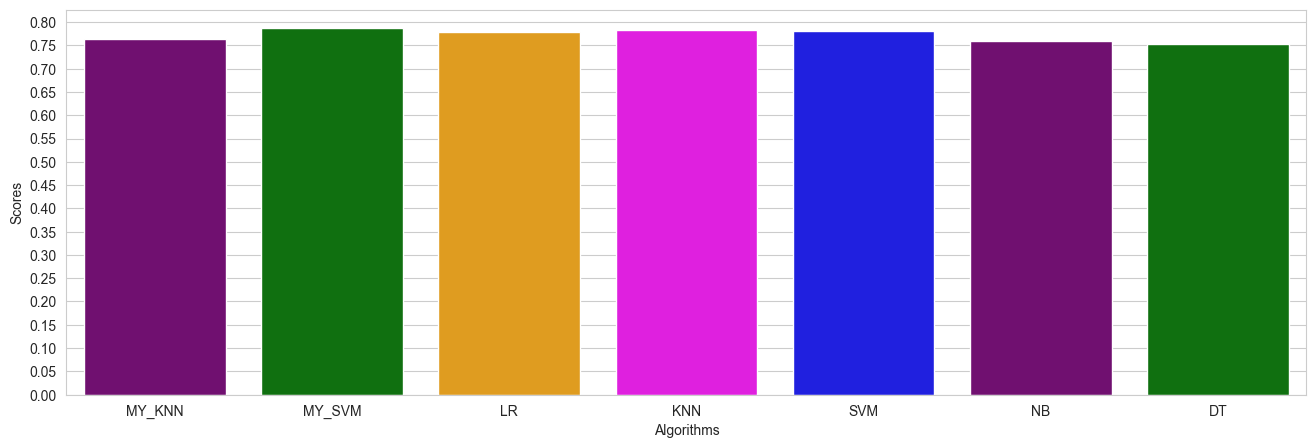

In [835]:
colors = ["purple", "green", "orange", "magenta", "blue"]
sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.ylabel("Scores")
plt.xlabel("Algorithms")
plt.yticks(np.arange(0, 1.05, 0.05))
sns.barplot(x=list(scores.keys()), y=list(scores.values()), palette=colors)
plt.show()

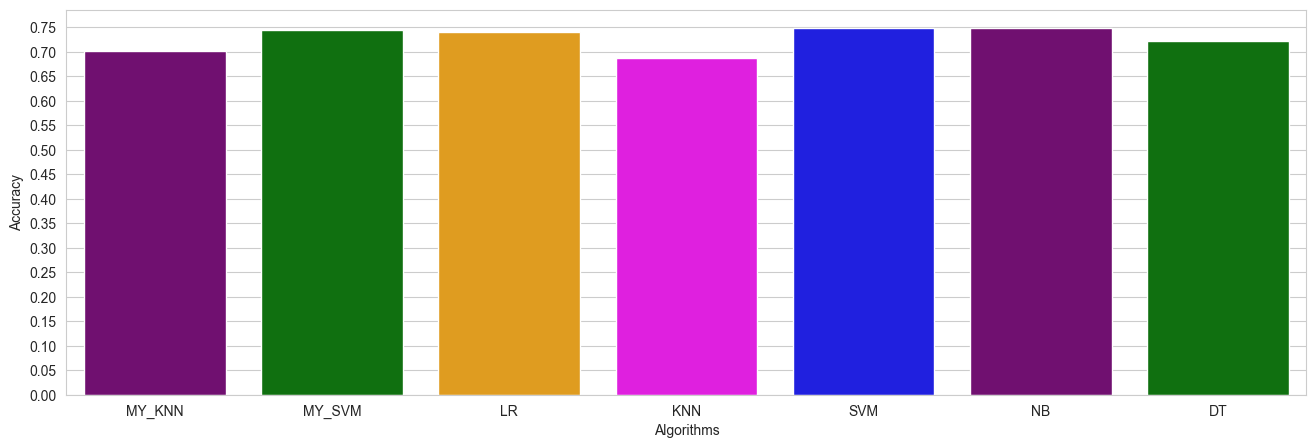

In [842]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
plt.yticks(np.arange(0, 1.05, 0.05))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

## Сравнить все обученные модели, построить их confusion matrices. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.

In [843]:
cm_my_knn = confusion_matrix(y_test, my_knn_prediction)
cm_my_svm = confusion_matrix(y_test, my_svm_prediction)
cm_lr = confusion_matrix(y_test, lr_prediction)
cm_knn = confusion_matrix(y_test, knn_prediction)
cm_svm = confusion_matrix(y_test, svm_prediction)
cm_nb = confusion_matrix(y_test, nb_prediction)
cm_dt = confusion_matrix(y_test, dt_prediction)

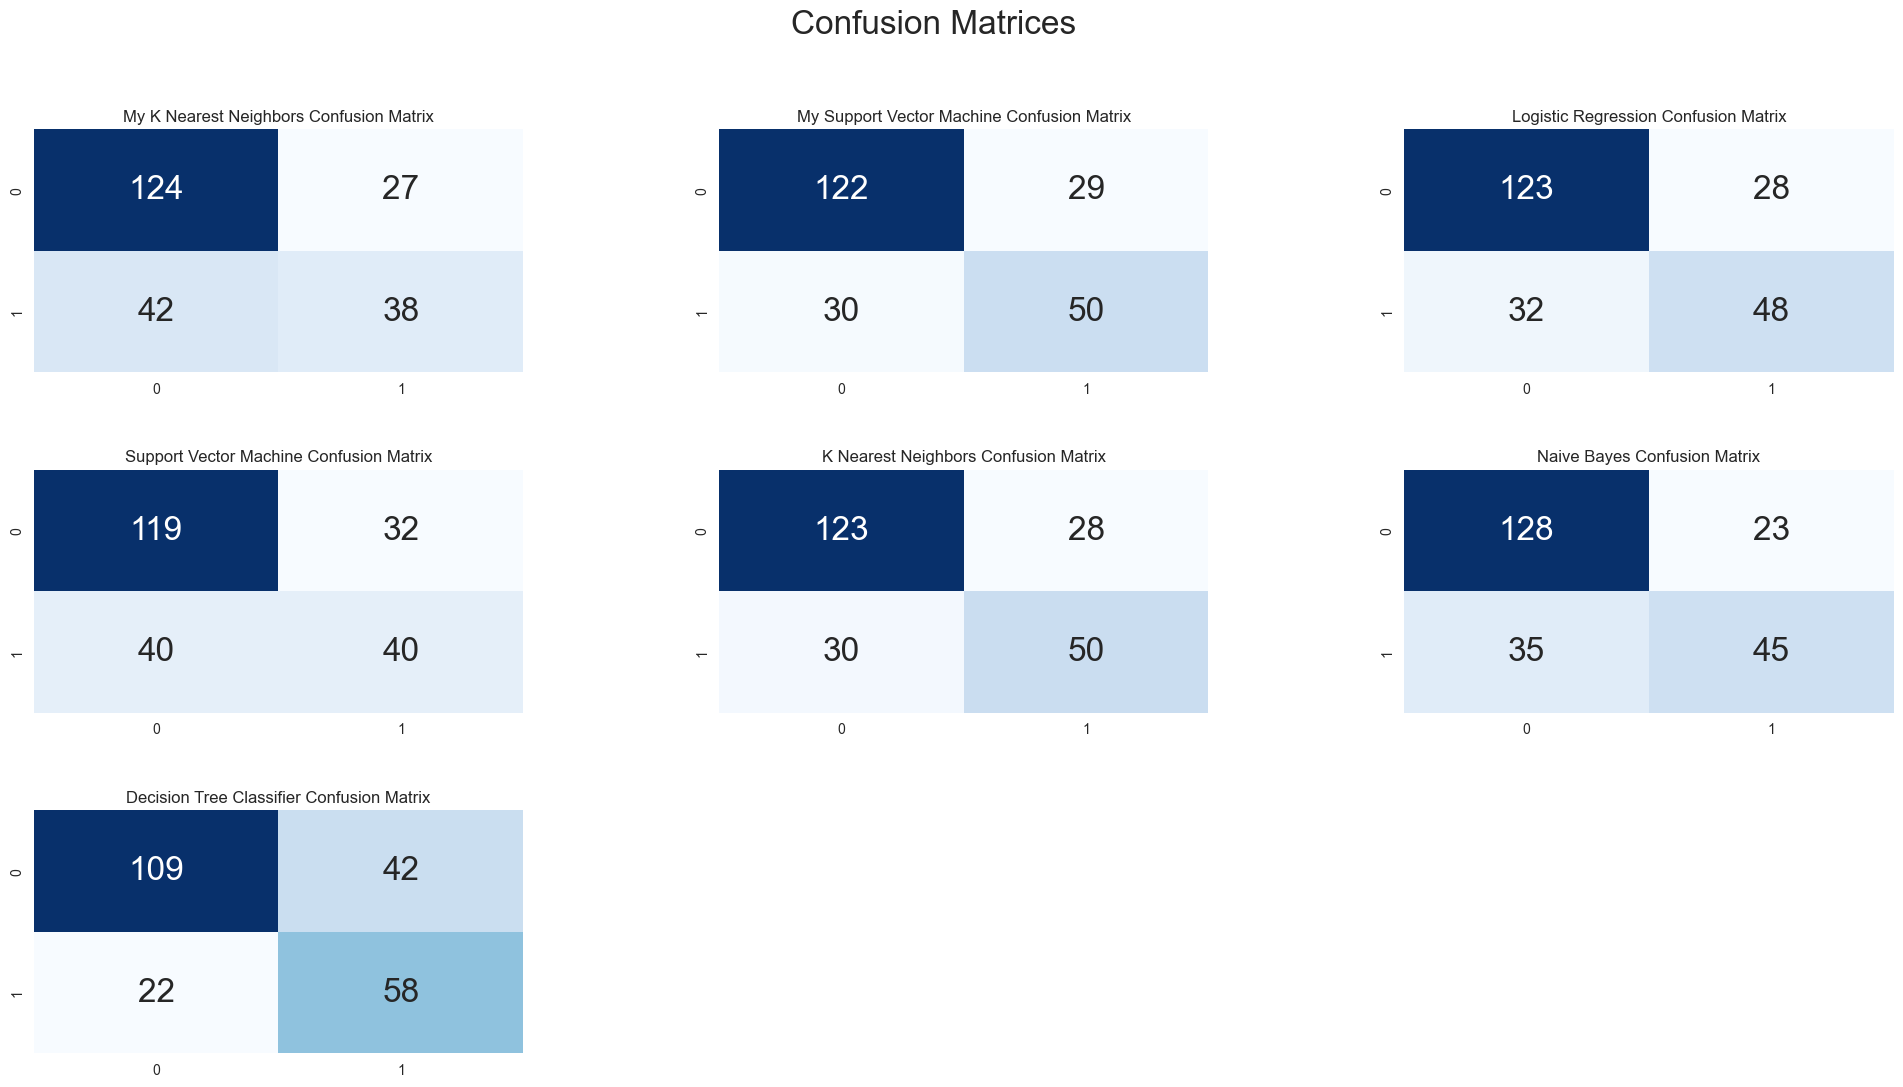

In [844]:
plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrices", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(3,3,1)
plt.title("My K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_my_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,2)
plt.title("My Support Vector Machine Confusion Matrix")
sns.heatmap(cm_my_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,3)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,4)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,5)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,6)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,7)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dt,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.show()

Лучшими моделями на предложенной выборке являются классификаторы K Nearest Neighbors и Naive Bayes Confusion.
Собственная реализации K Nearest Neighbors и My Support Vector Machine снова показали очень хороший результат.
Все алгоритмы показали достаточно схожий результат